In [2]:
import importlib
import os
import fnmatch
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import csv
from sklearn import tree
import sys
sys.stdout.flush()
import math
import matplotlib.pyplot as plt
from matplotlib.table import Table
import segment_cluster as sc
import importlib
importlib.reload(sc)
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import LeaveOneOut

In [3]:
np.random.seed(0)
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)

In [30]:
seg_slide=1
seg_lens=[4,6,8,12,20,30,50,100]
k_clusters=[10,25,50,75,100,150]

(10, 4, 625.0443585003688, 460.44998387626237, 869.3213457091973)


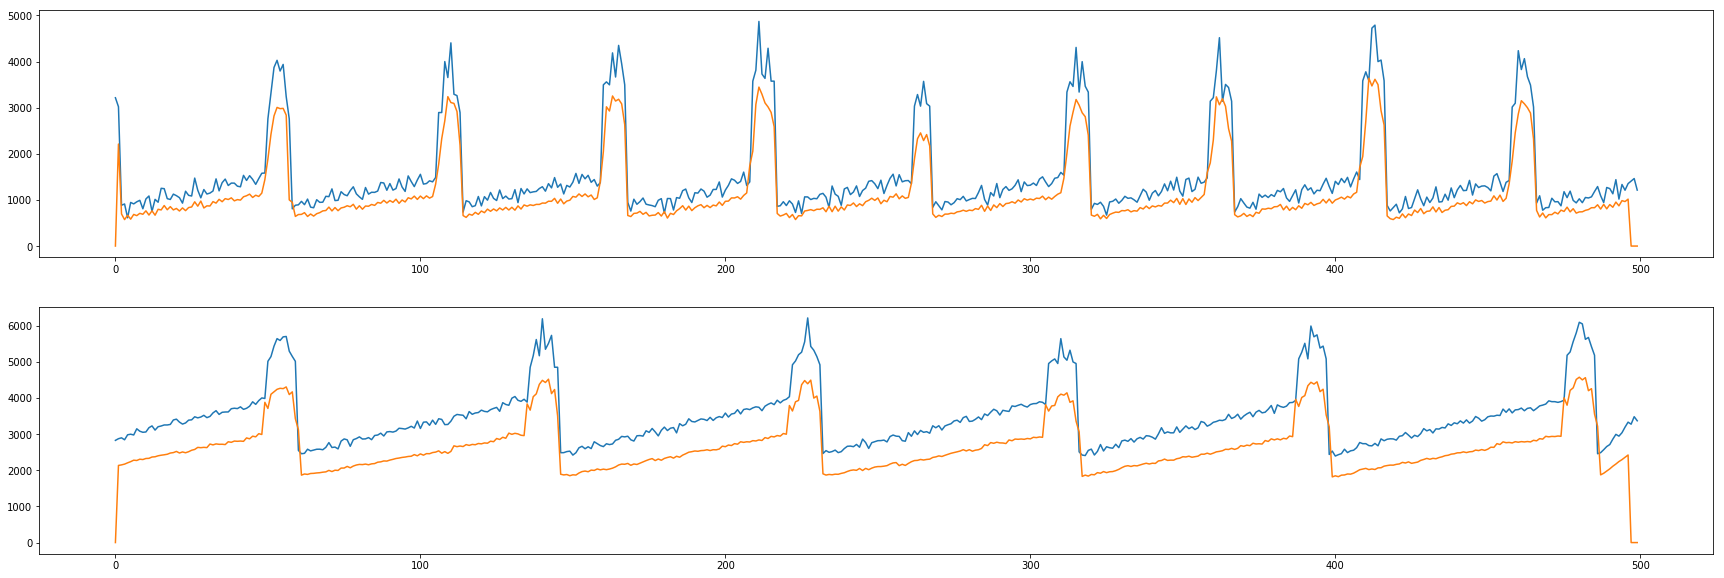

(10, 6, 540.02024487517, 410.32713007065547, 734.4086282040772)


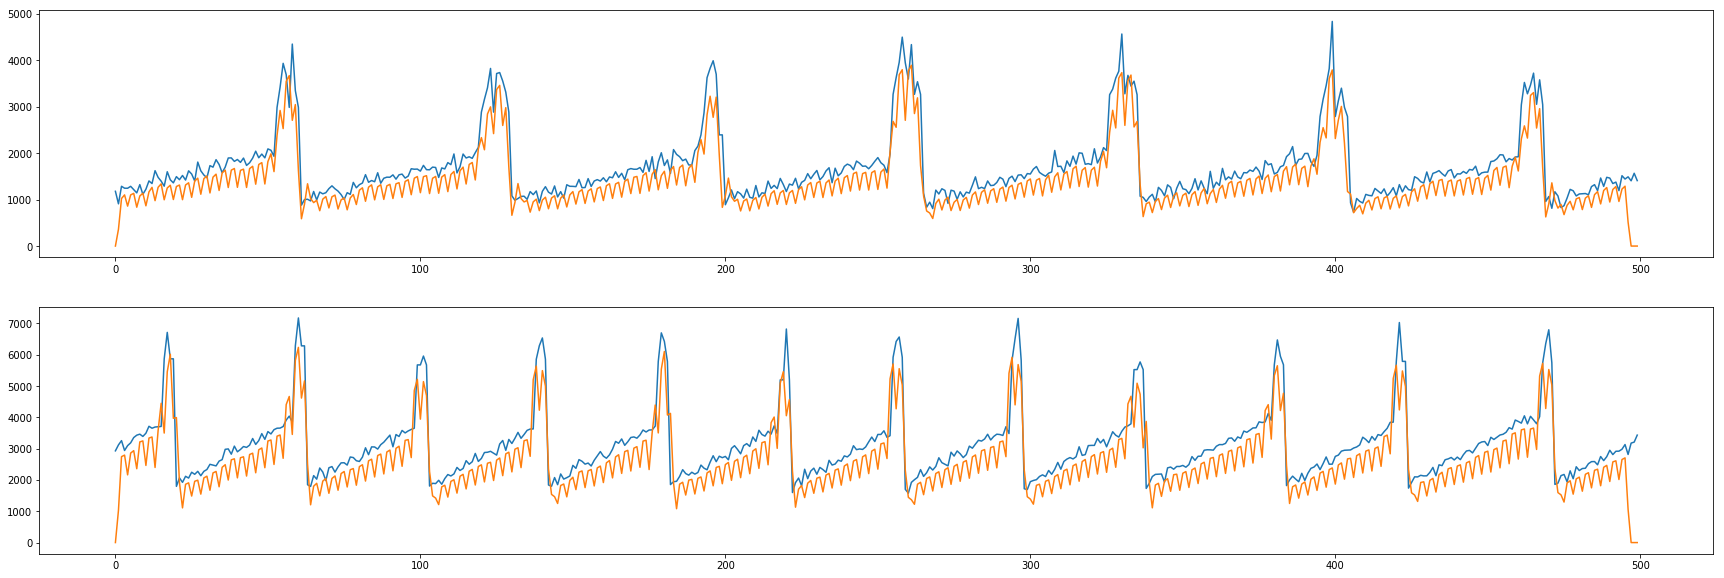

(10, 8, 451.2977453538033, 344.11297826341894, 637.1466038928706)


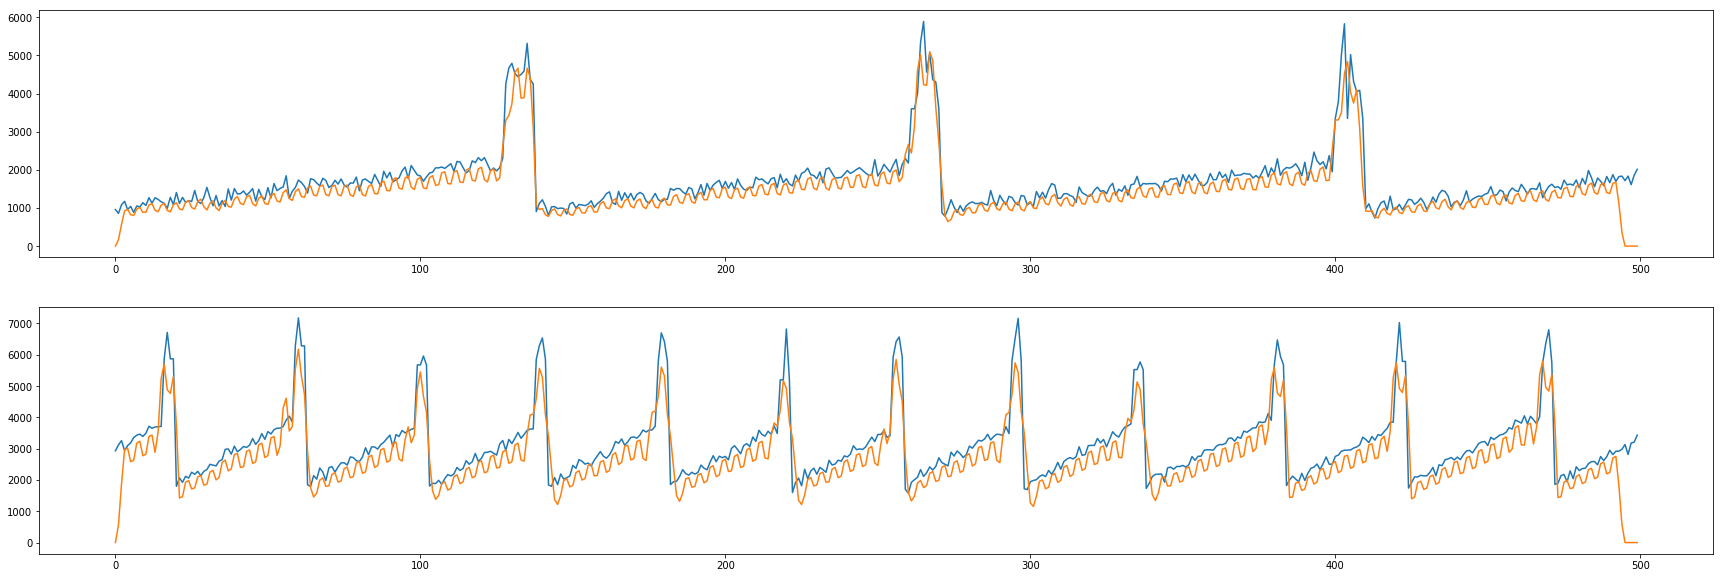

(10, 12, 395.9072955474355, 270.5132629581977, 661.3432654152772)


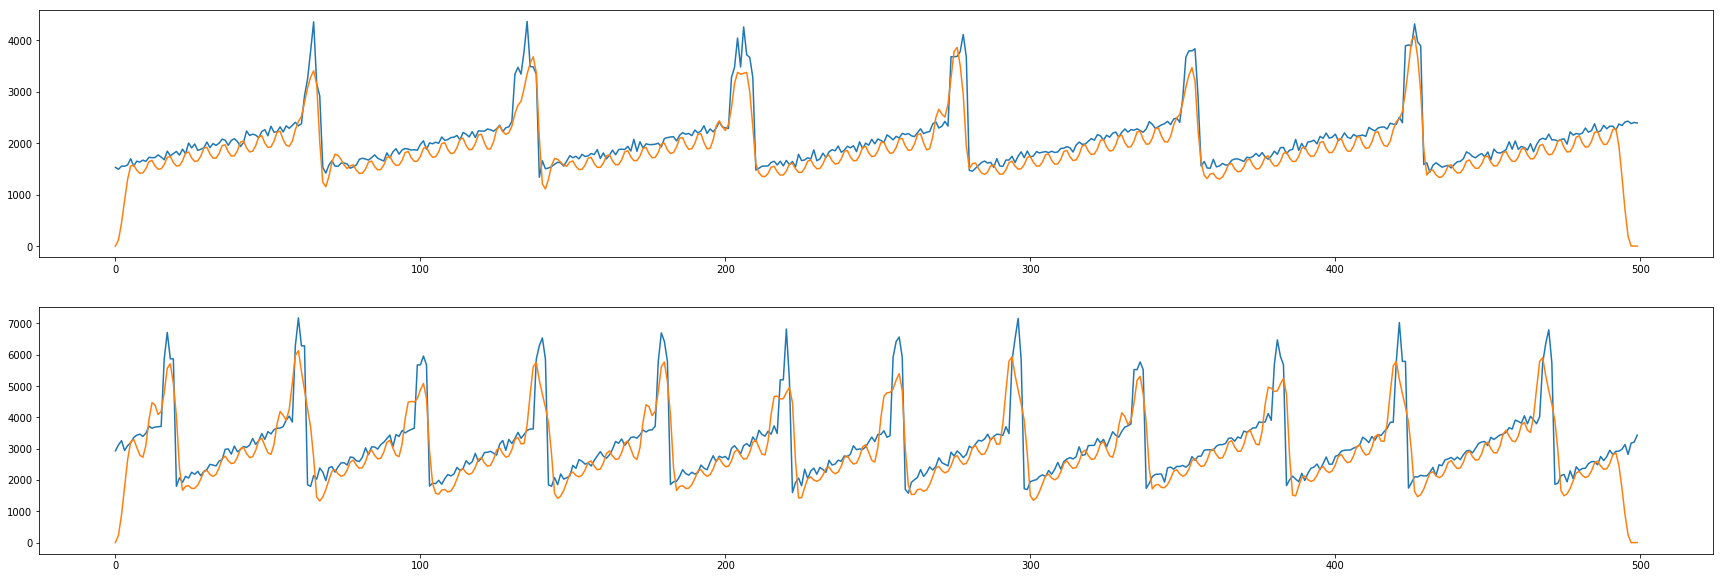

(10, 20, 383.0964236833475, 211.93386666852317, 638.3371660391349)


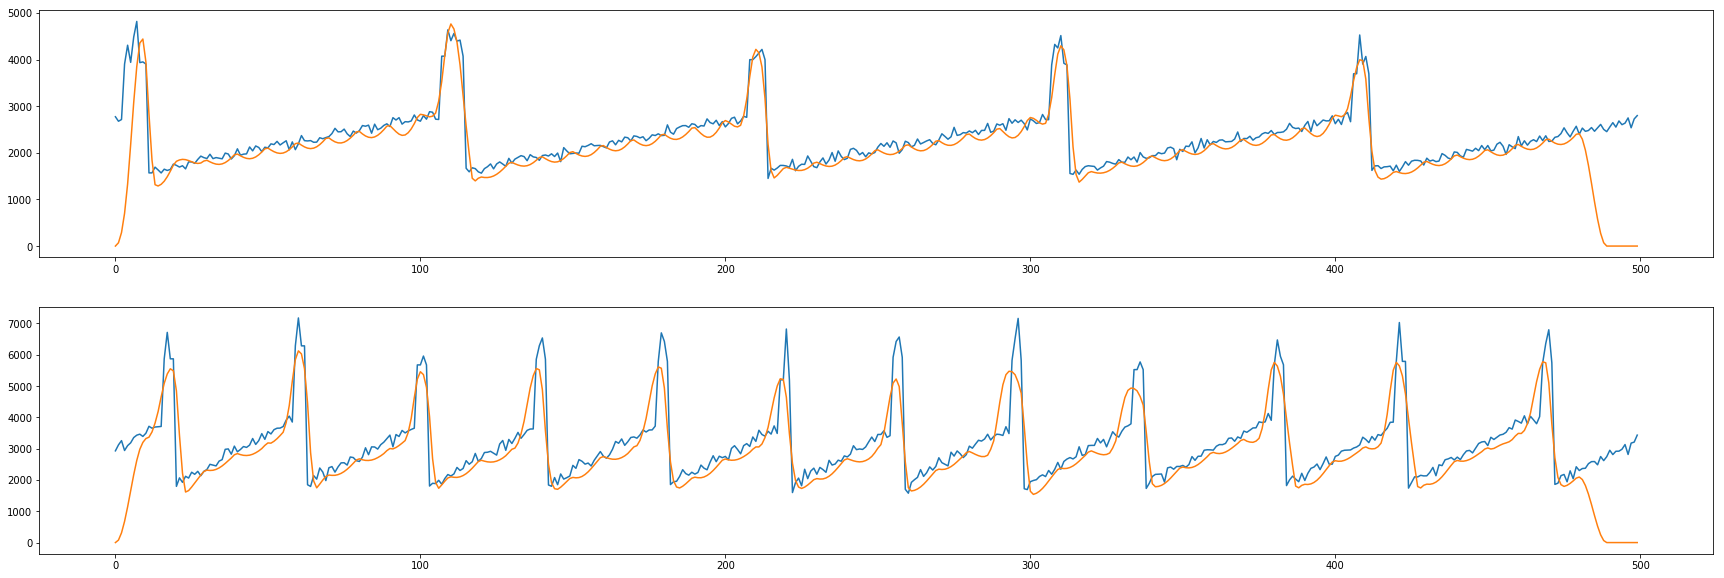

(10, 30, 418.07841182810176, 228.23228687834234, 701.3217871473263)


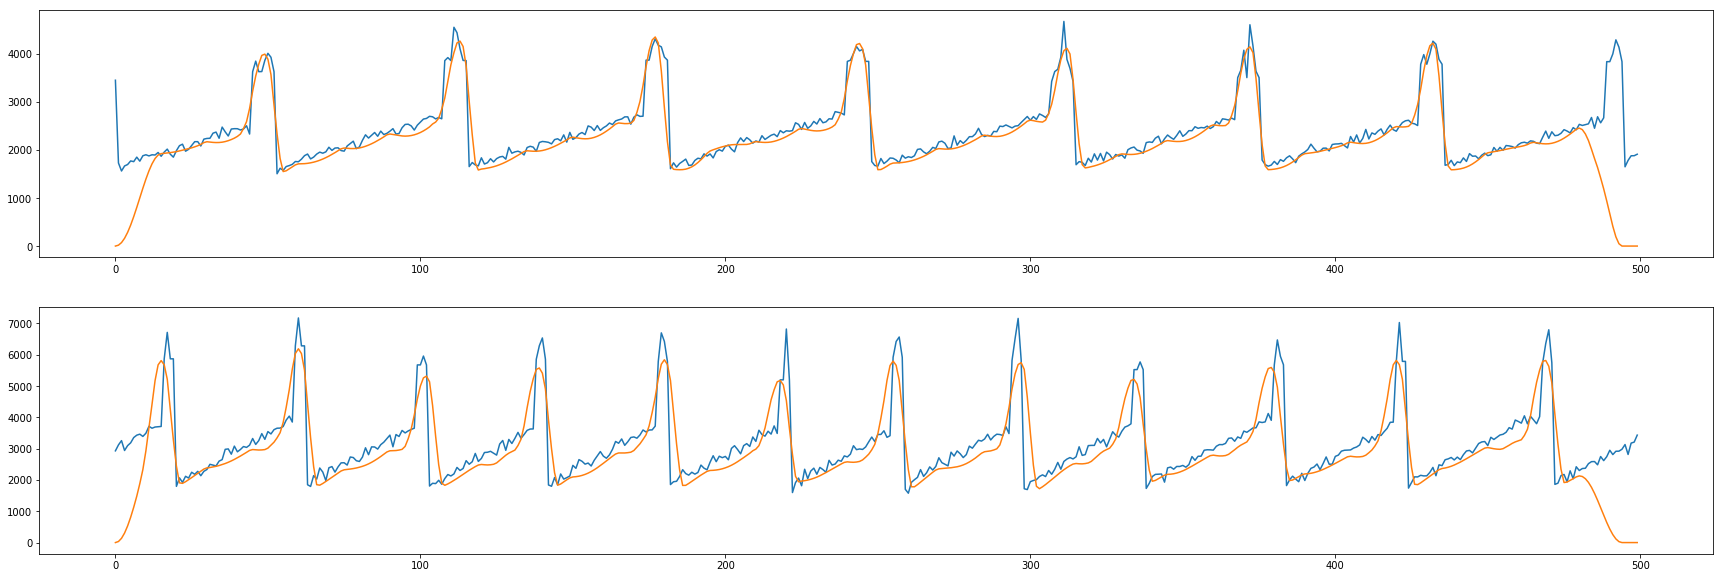

(10, 50, 476.1759604992039, 240.79829725430903, 923.8461060397588)


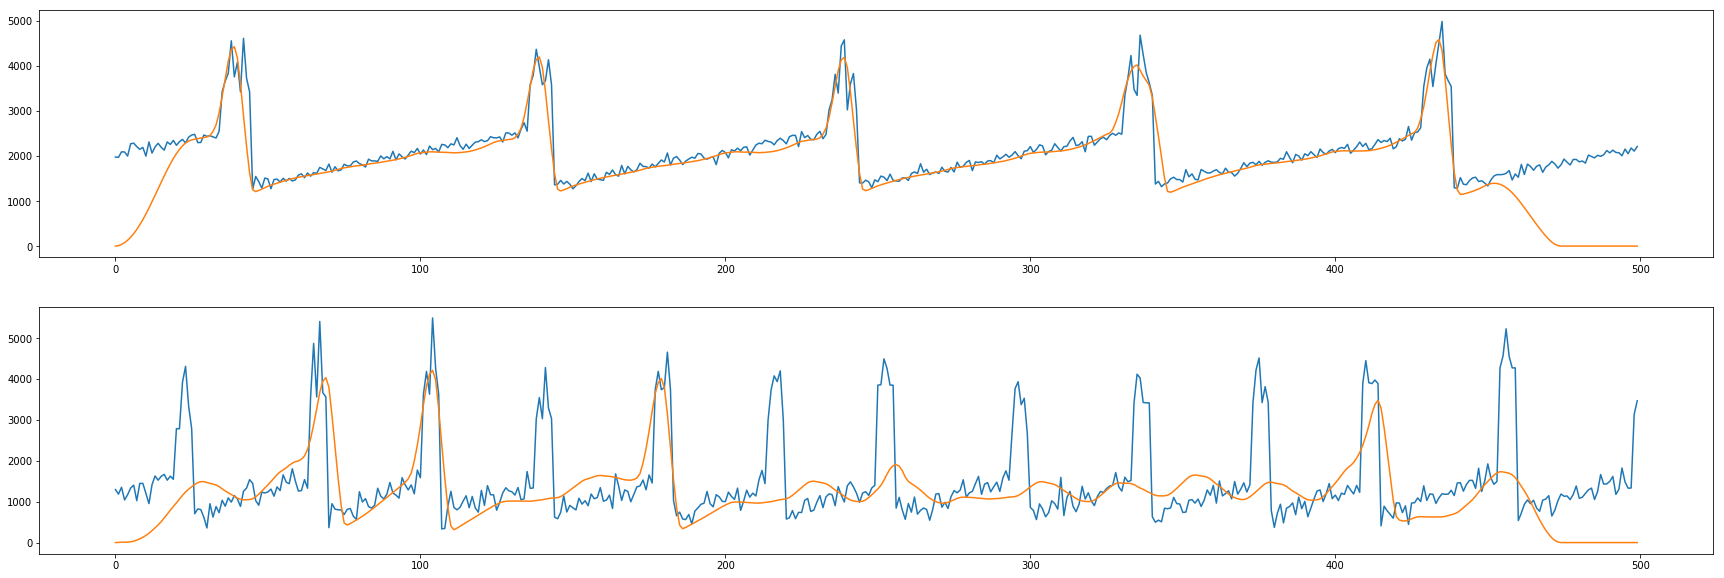

(10, 100, 703.2341898009564, 369.09735053564833, 1145.318301129042)


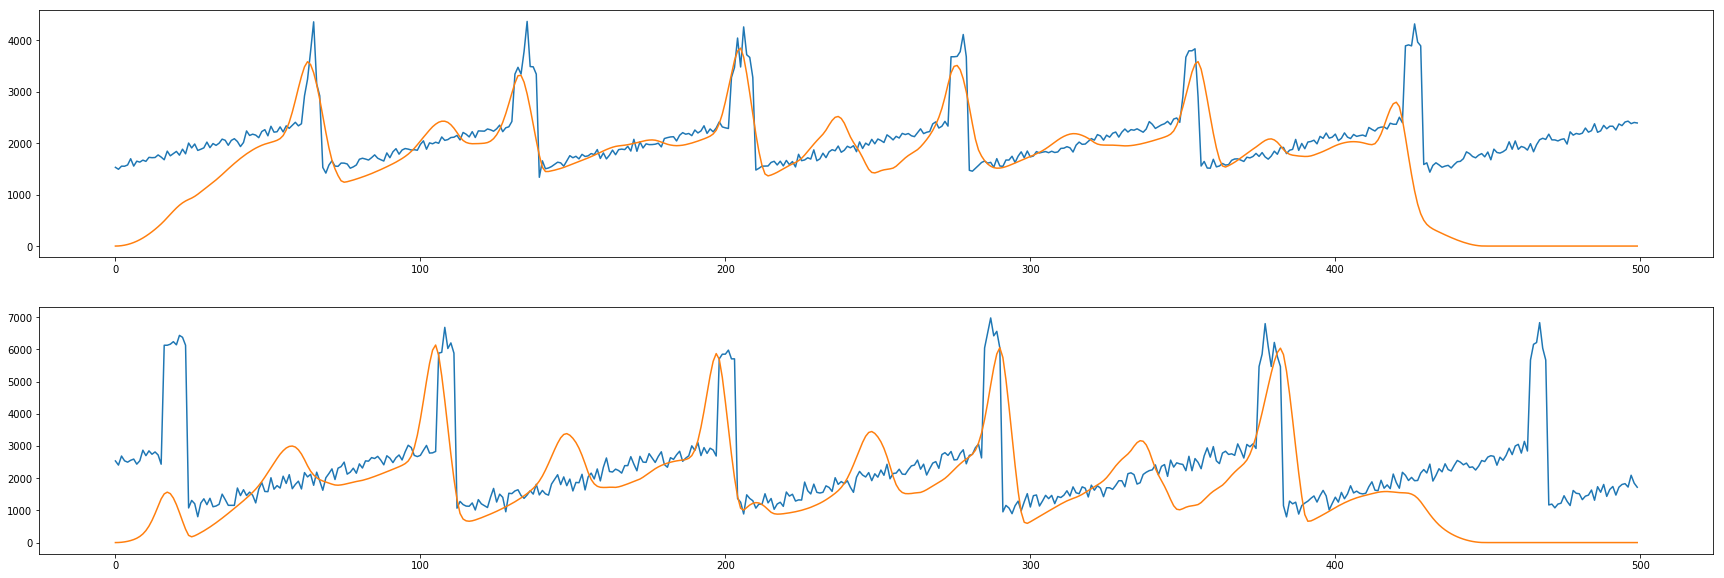

(25, 4, 626.2380644738986, 452.24089083906387, 855.4963262320804)


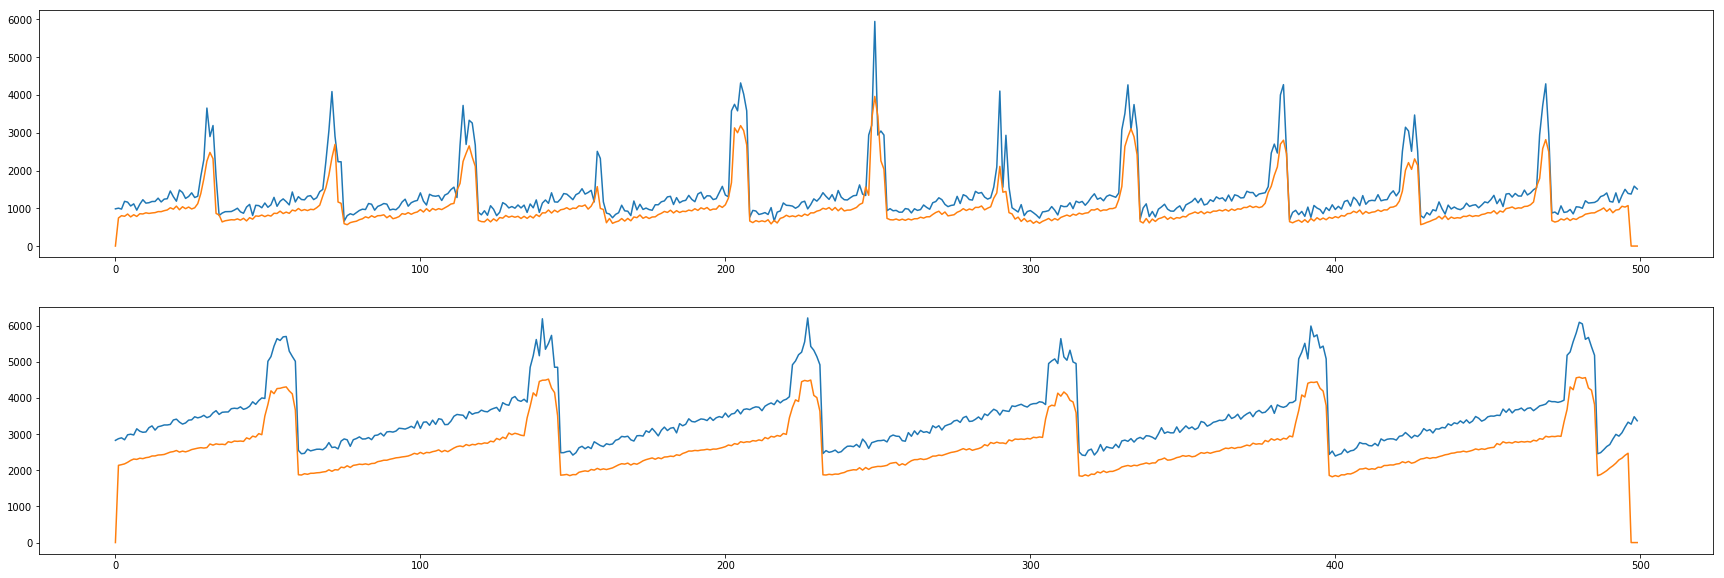

(25, 6, 515.9331249952469, 384.6778913394321, 707.1342642729429)


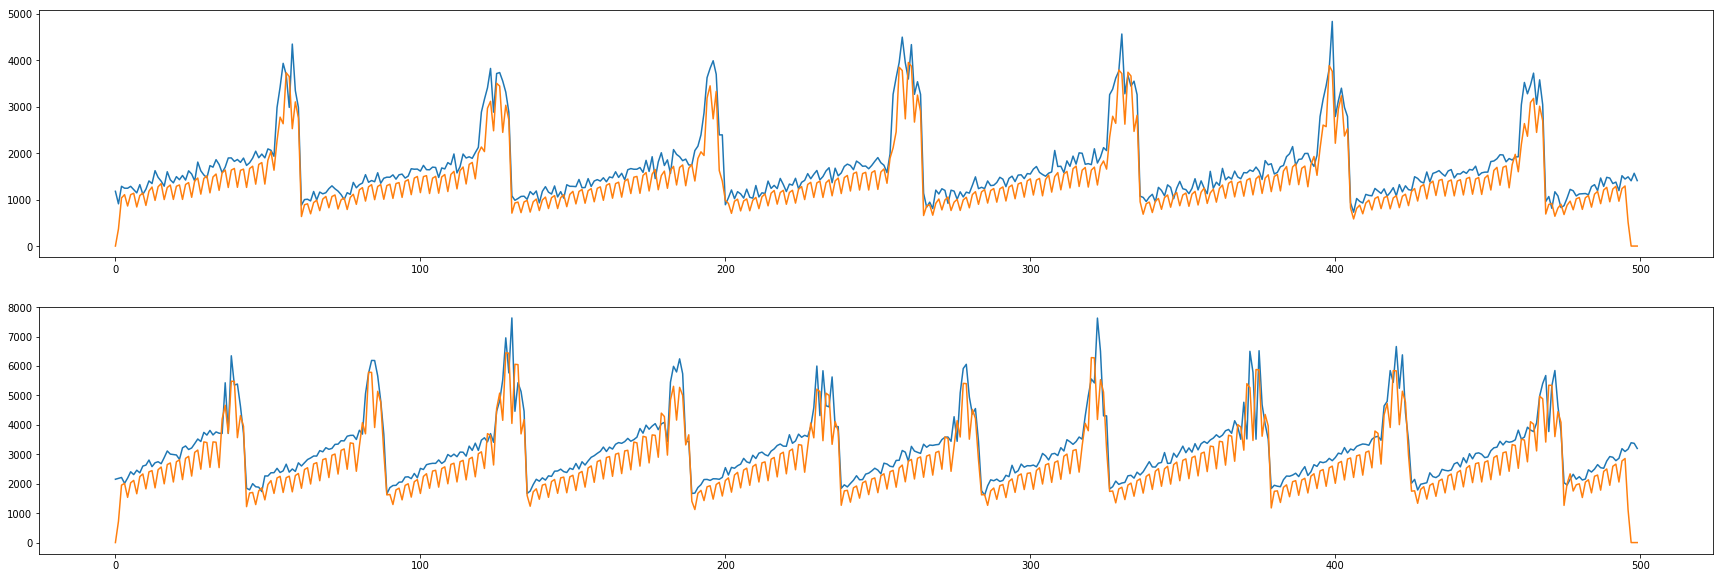

(25, 8, 421.72823575532084, 323.1001733295211, 592.1405990642902)


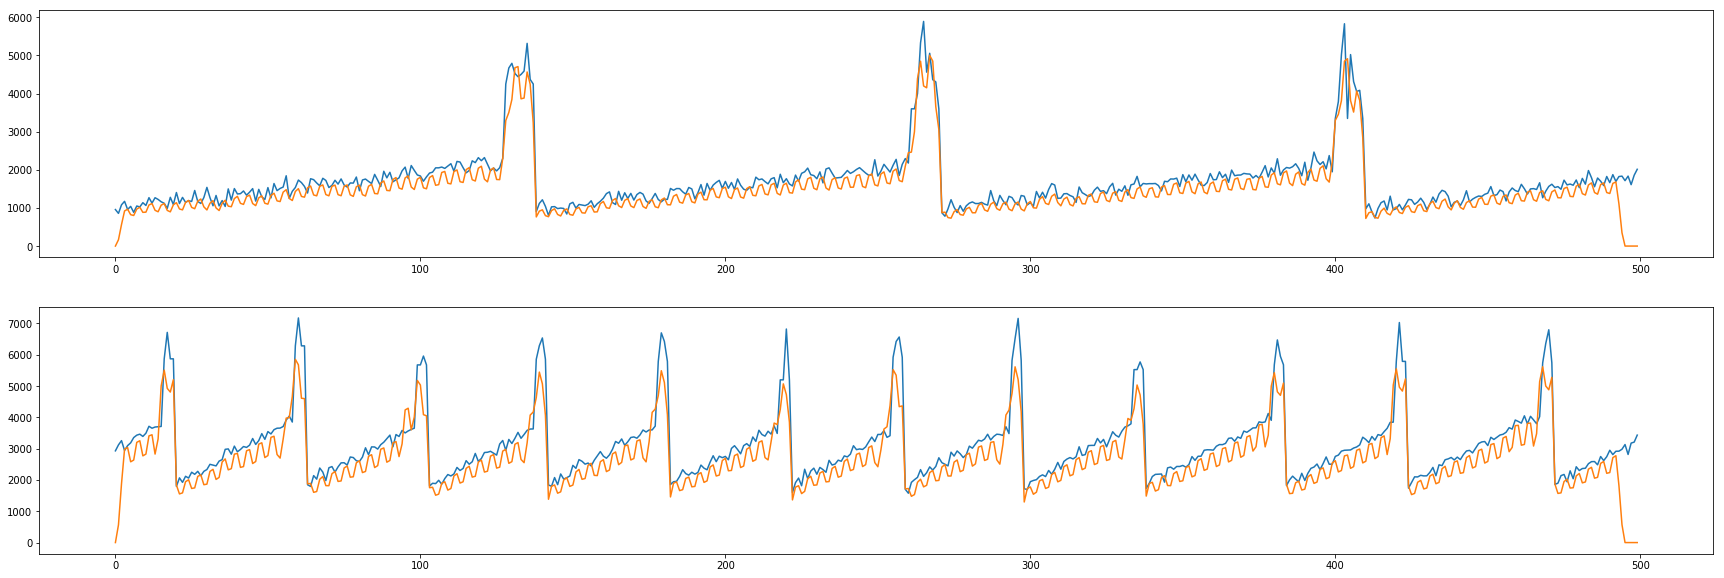

(25, 12, 343.45371728953205, 238.60756049914835, 589.0703922754686)


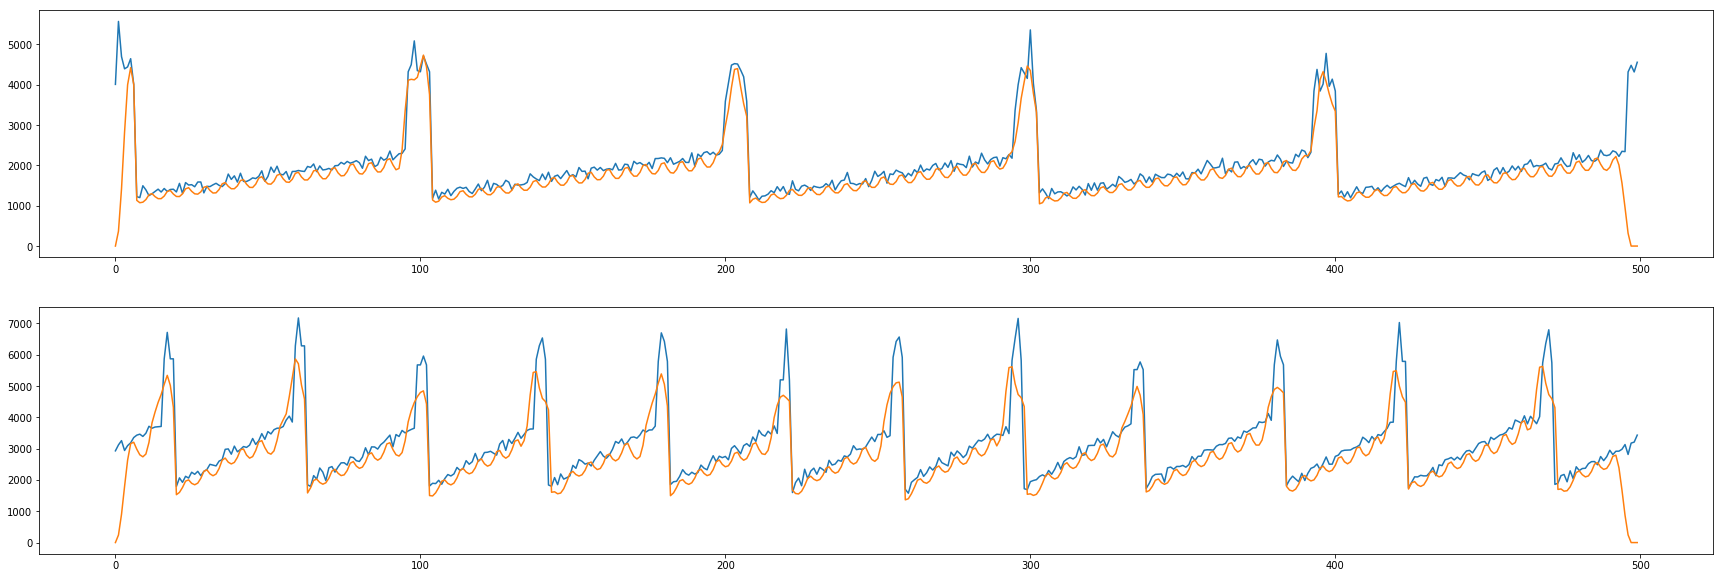

(25, 20, 339.76381840012783, 206.06253145858545, 559.9522307433459)


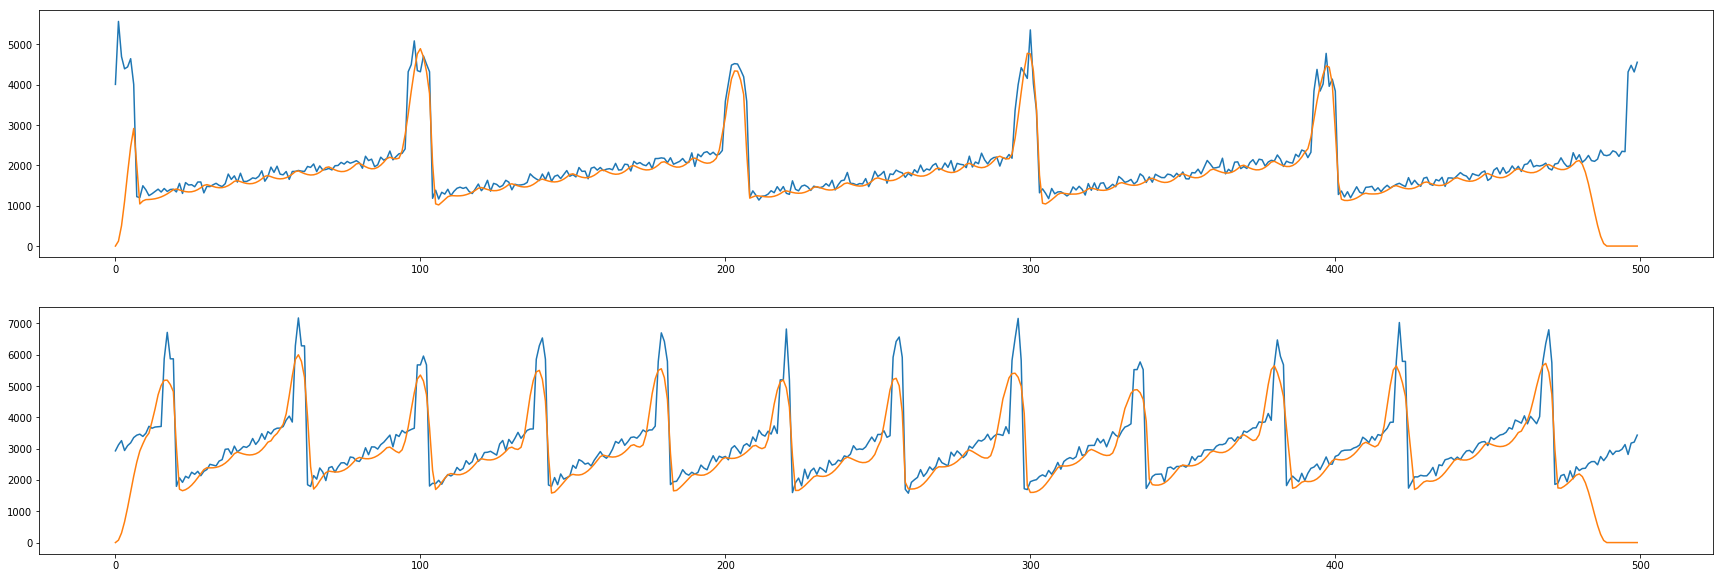

(25, 30, 362.02835786704725, 196.05076171867873, 657.8489284144541)


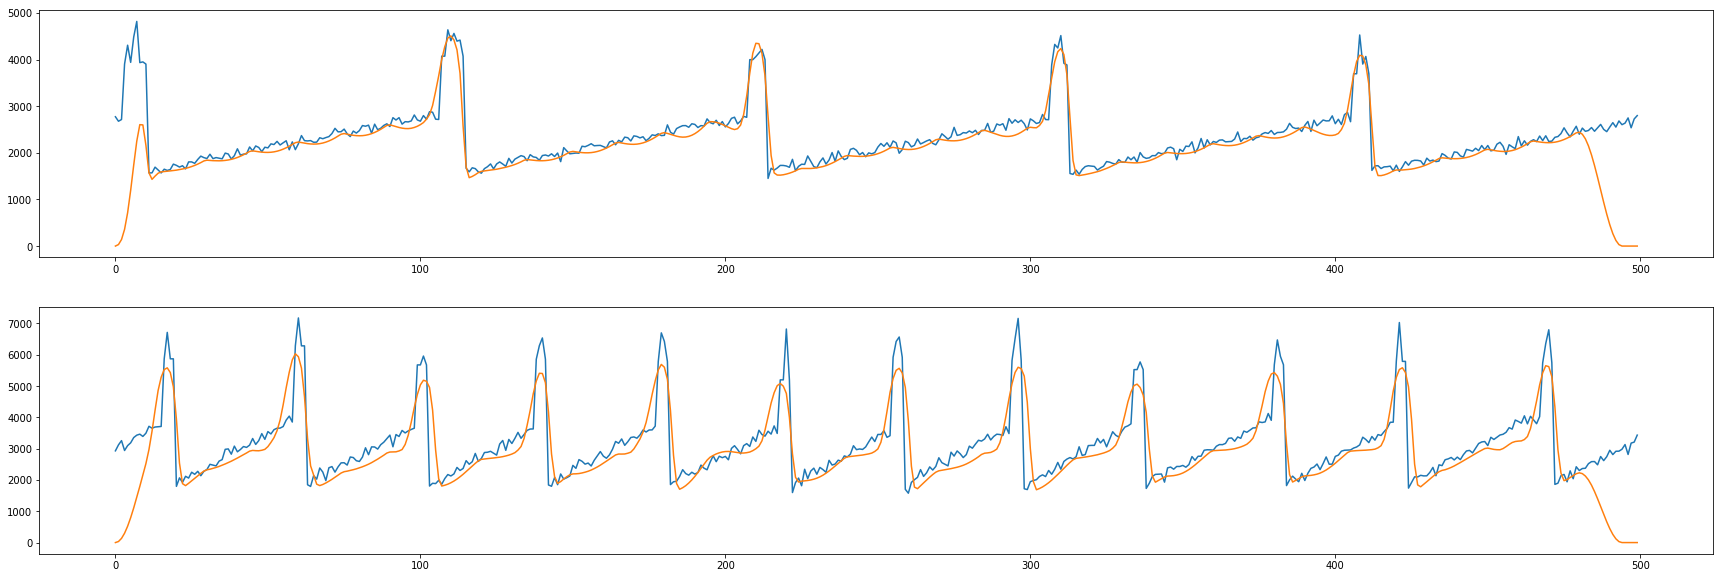

(25, 50, 407.86685645865913, 194.16620035674896, 758.6618705738969)


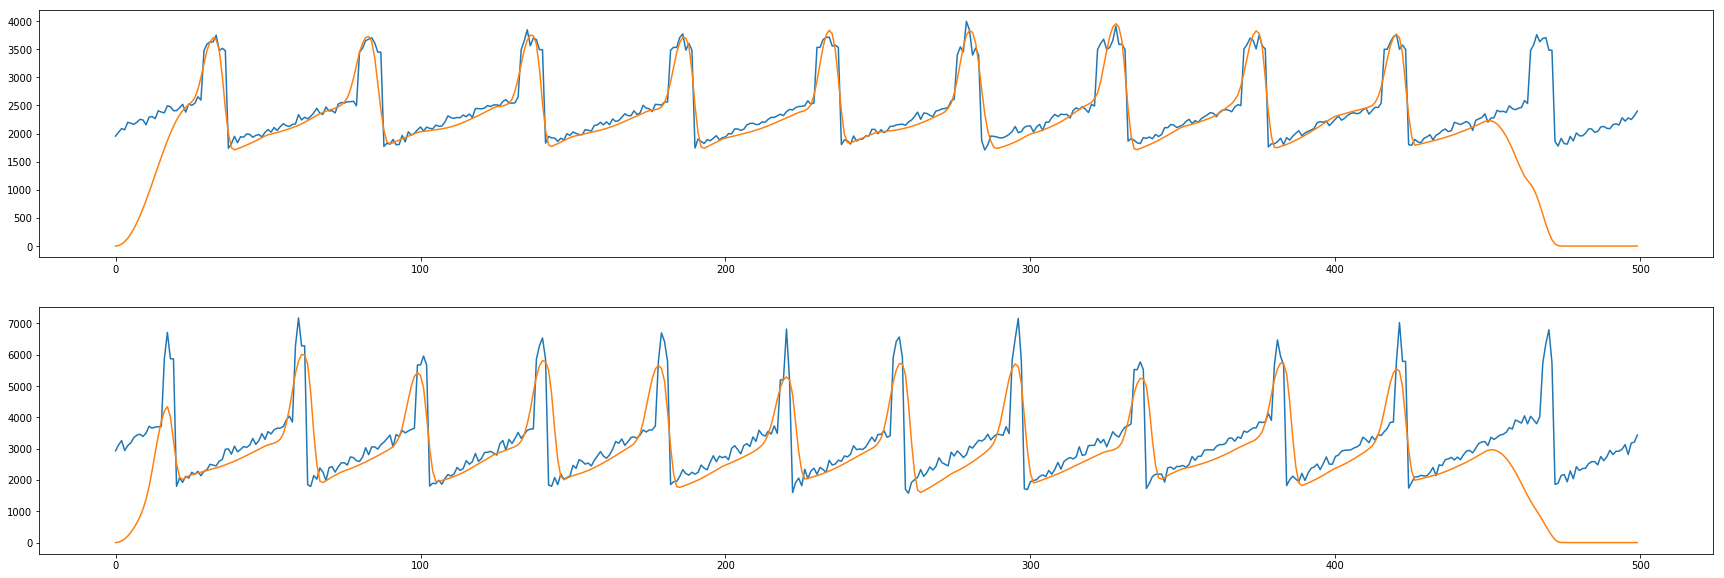

(25, 100, 648.8234447886741, 331.5696281148799, 1338.6215504445022)


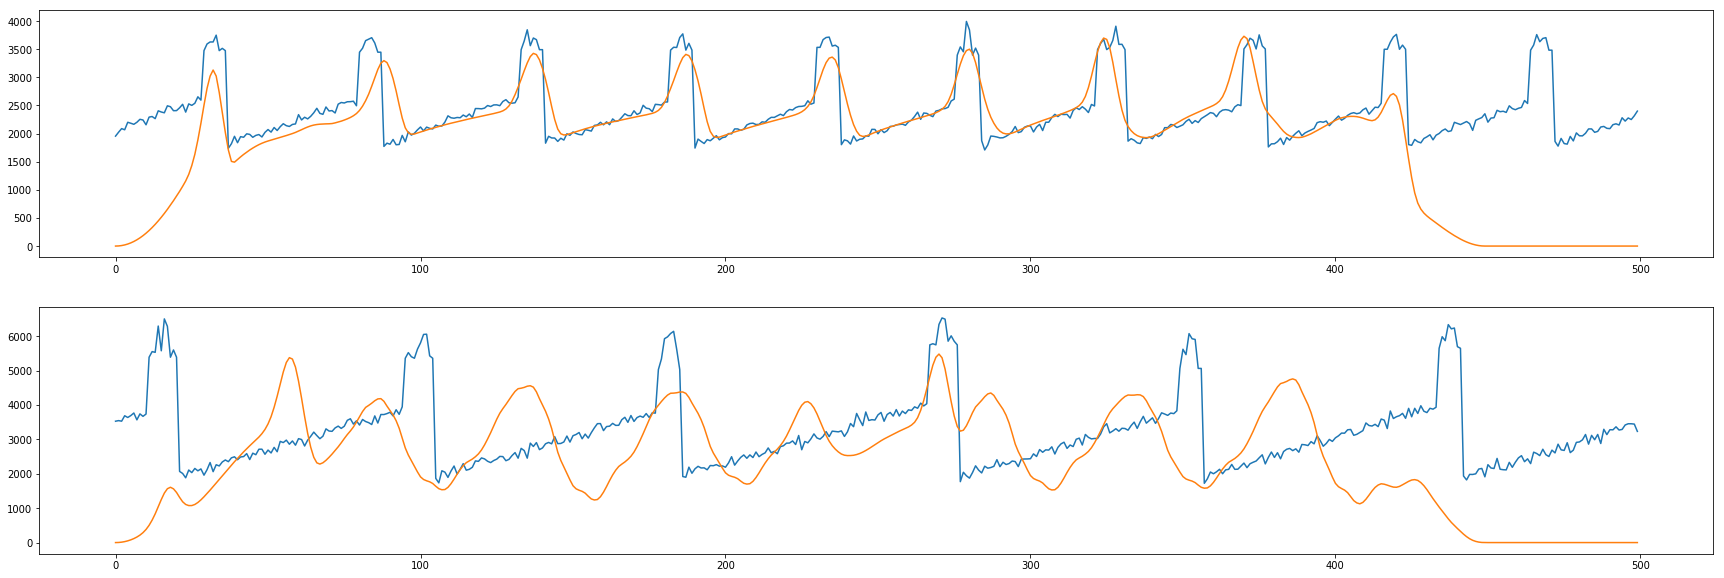

(50, 4, 628.4129484350349, 431.3158289310081, 884.77510666523)


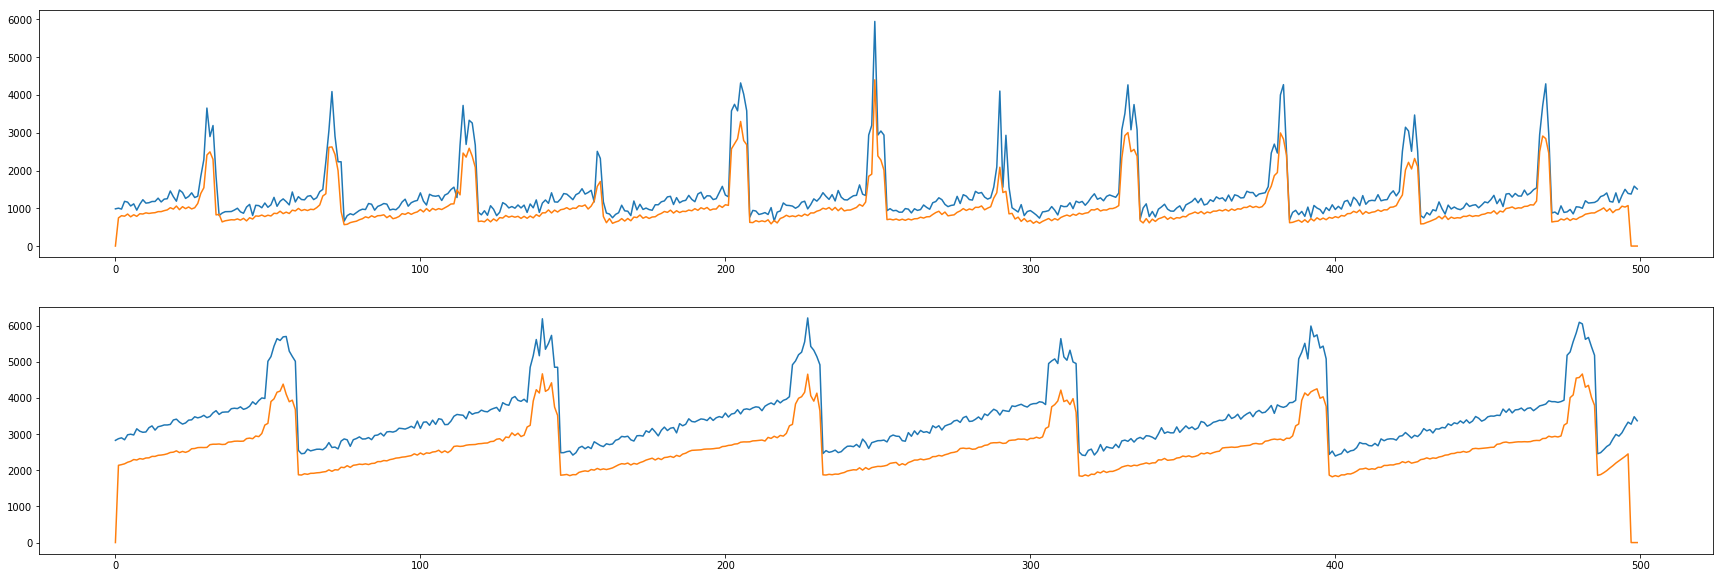

(50, 6, 508.70614067130026, 372.6931120650738, 703.2678500666727)


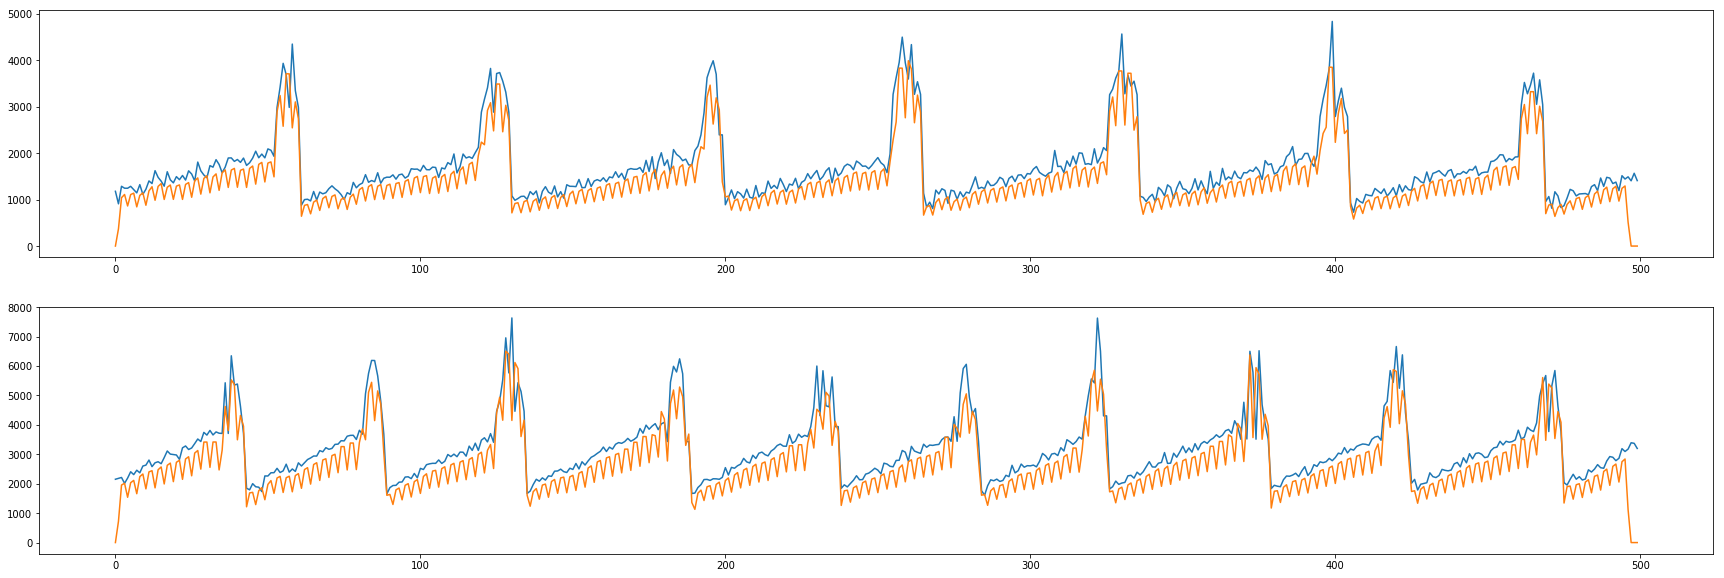

(50, 8, 409.12533111471794, 300.0587733842711, 567.9224125544156)


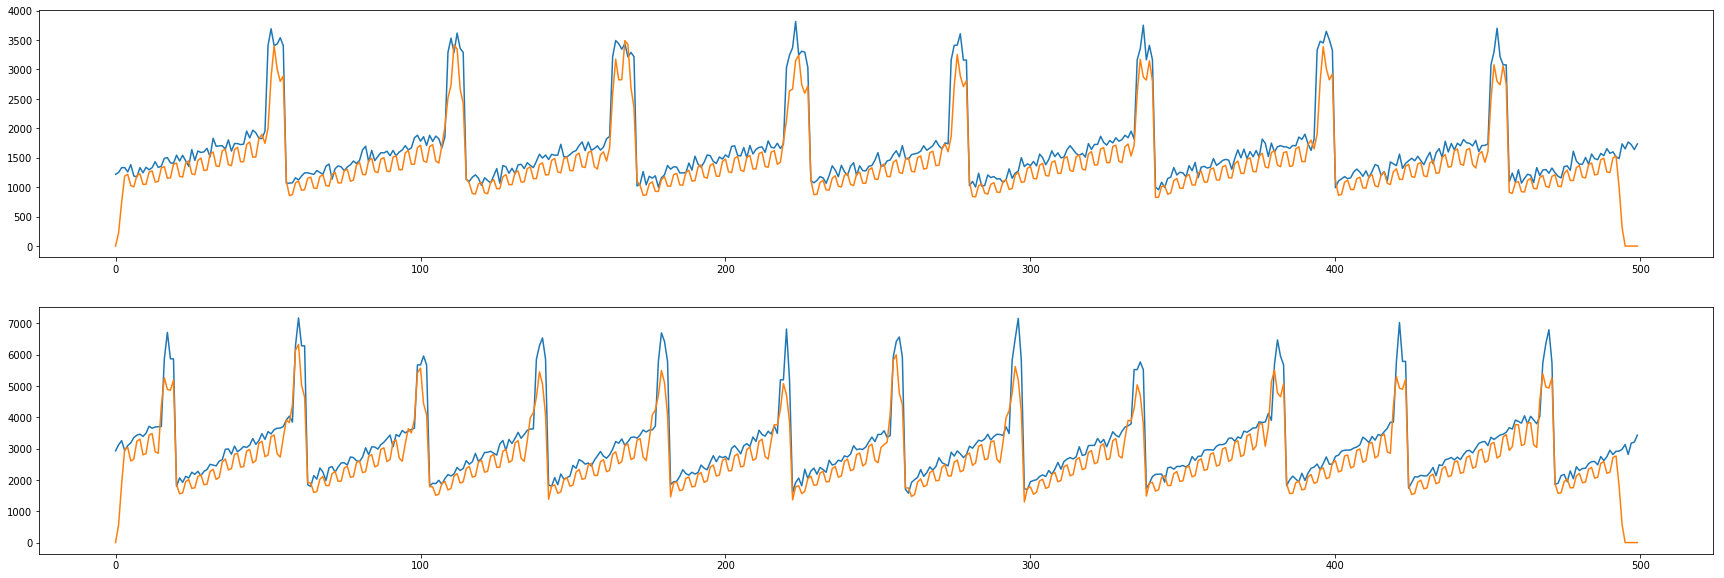

(50, 12, 324.259795512451, 232.4373776880282, 503.68506008107926)


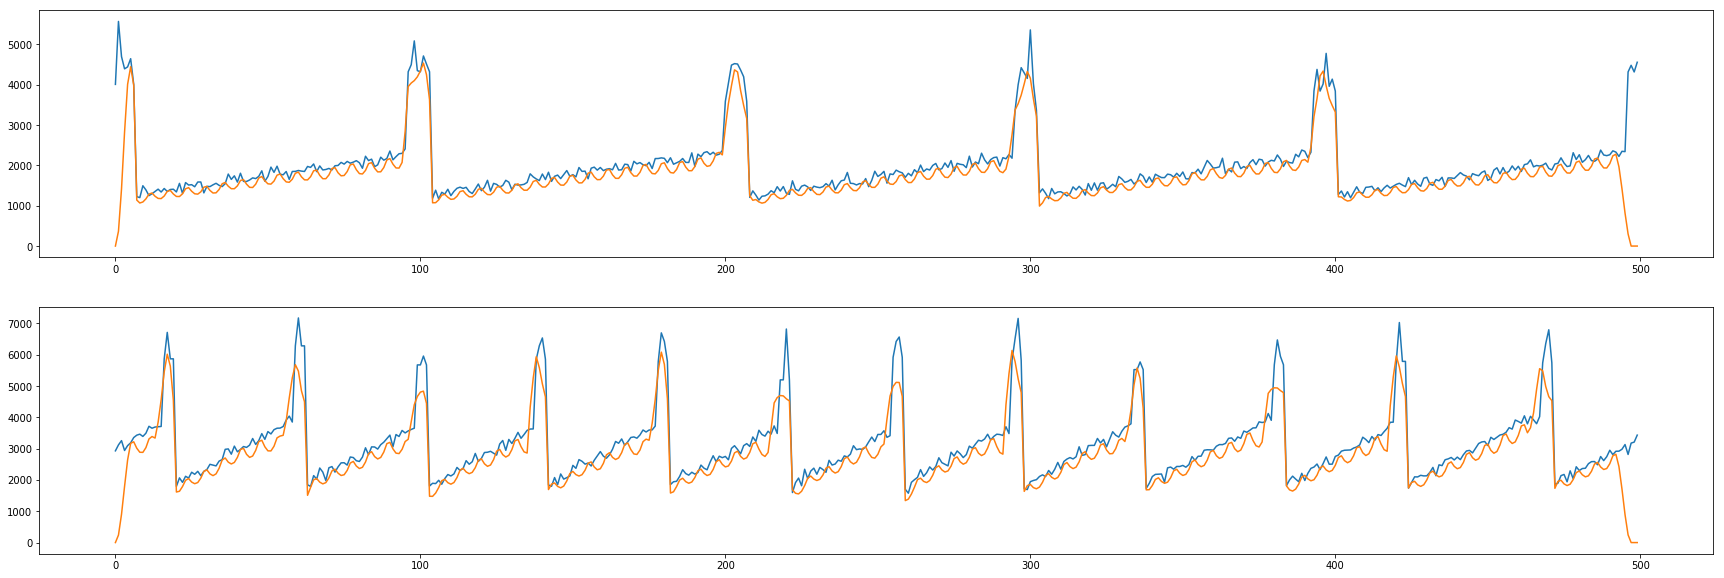

(50, 20, 306.69934813717066, 166.43724522460482, 542.9618506675325)


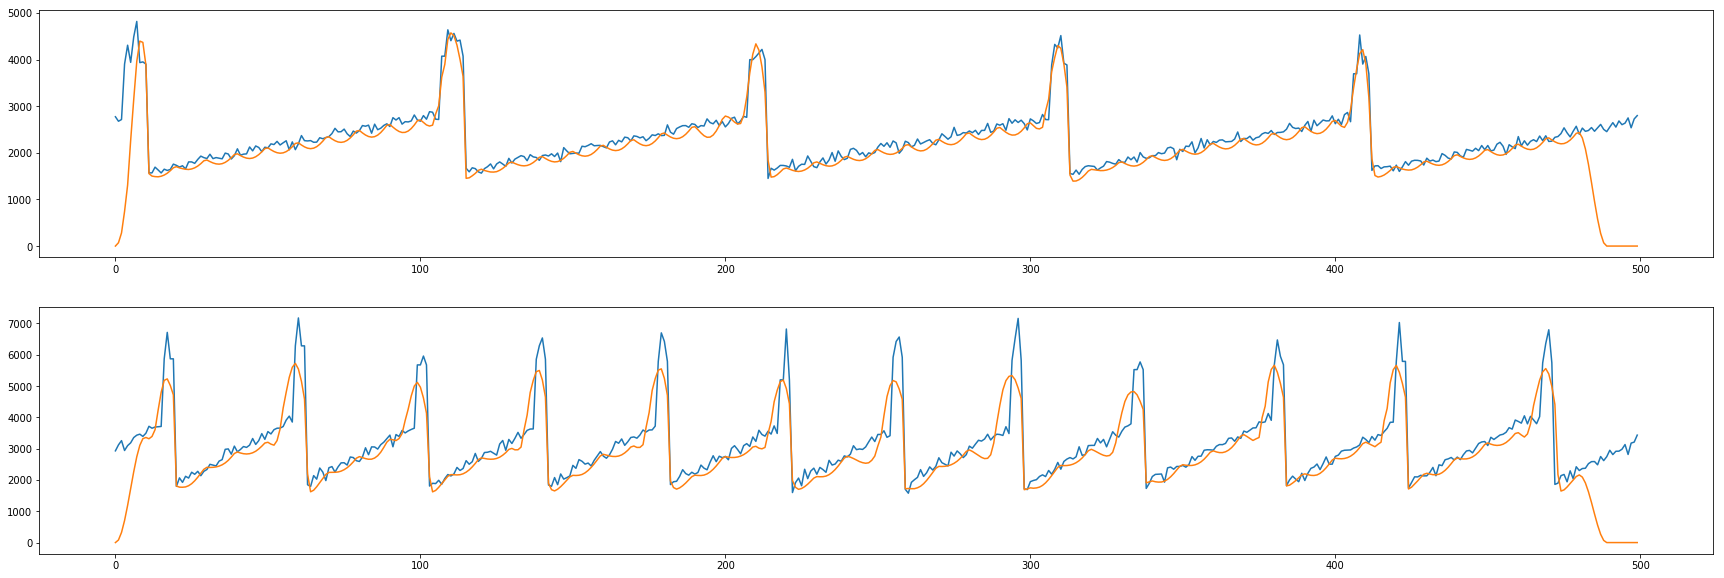

(50, 30, 317.6580053172299, 165.15848574495502, 585.0667813805959)


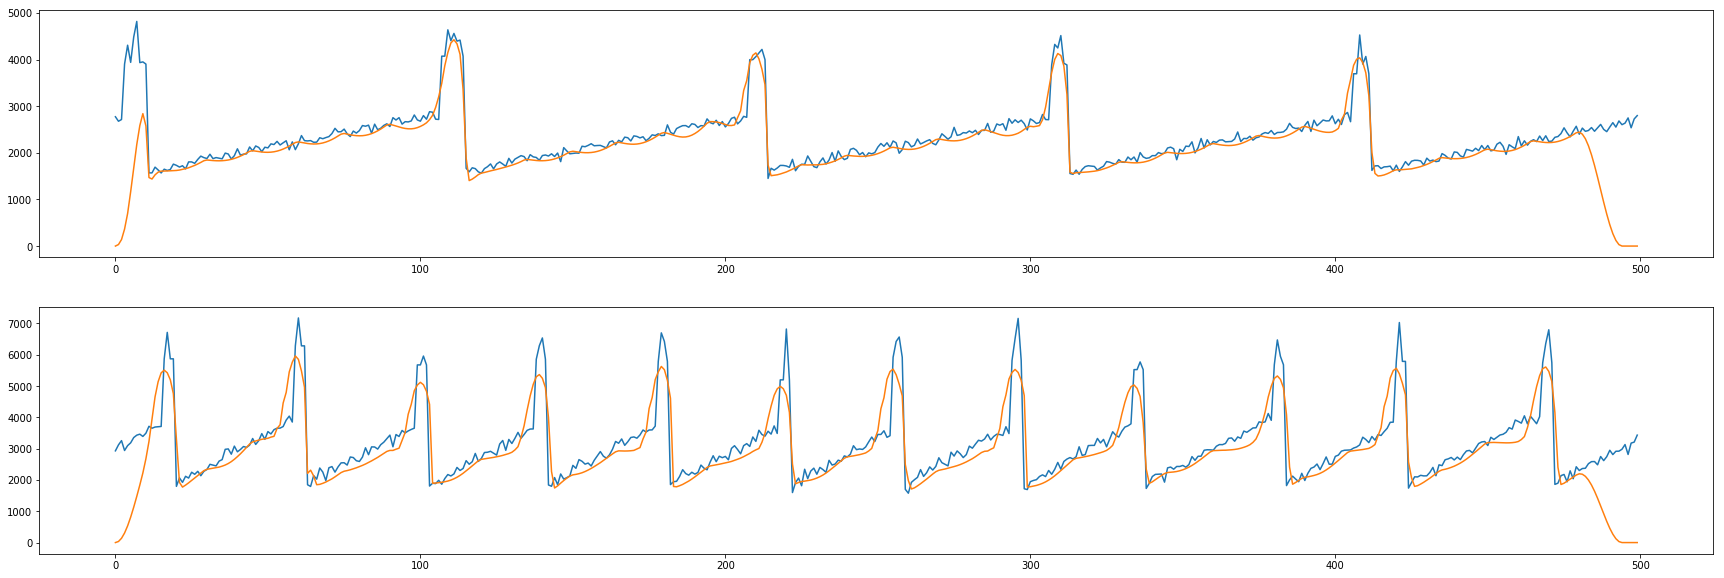

(50, 50, 356.85704847145263, 176.24024726931574, 661.6859924642288)


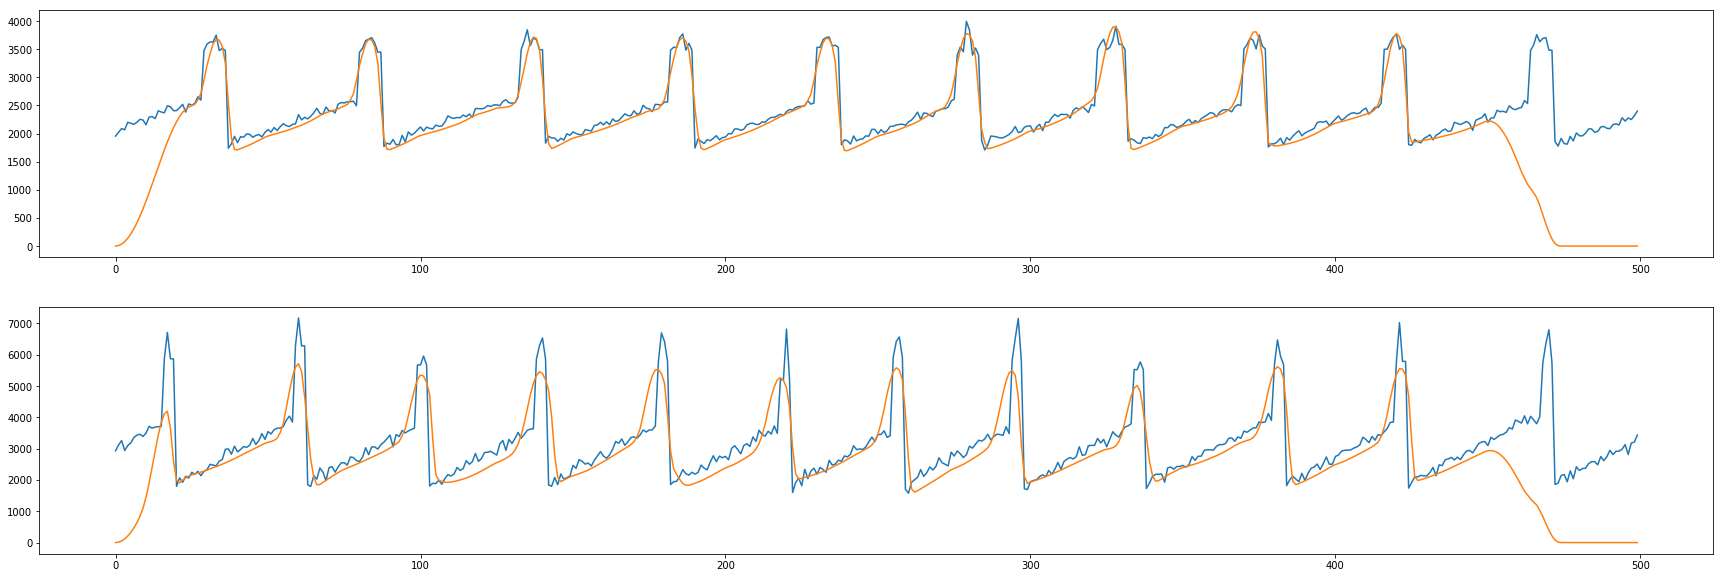

(50, 100, 536.8821972927823, 258.7774395319264, 944.0277590849751)


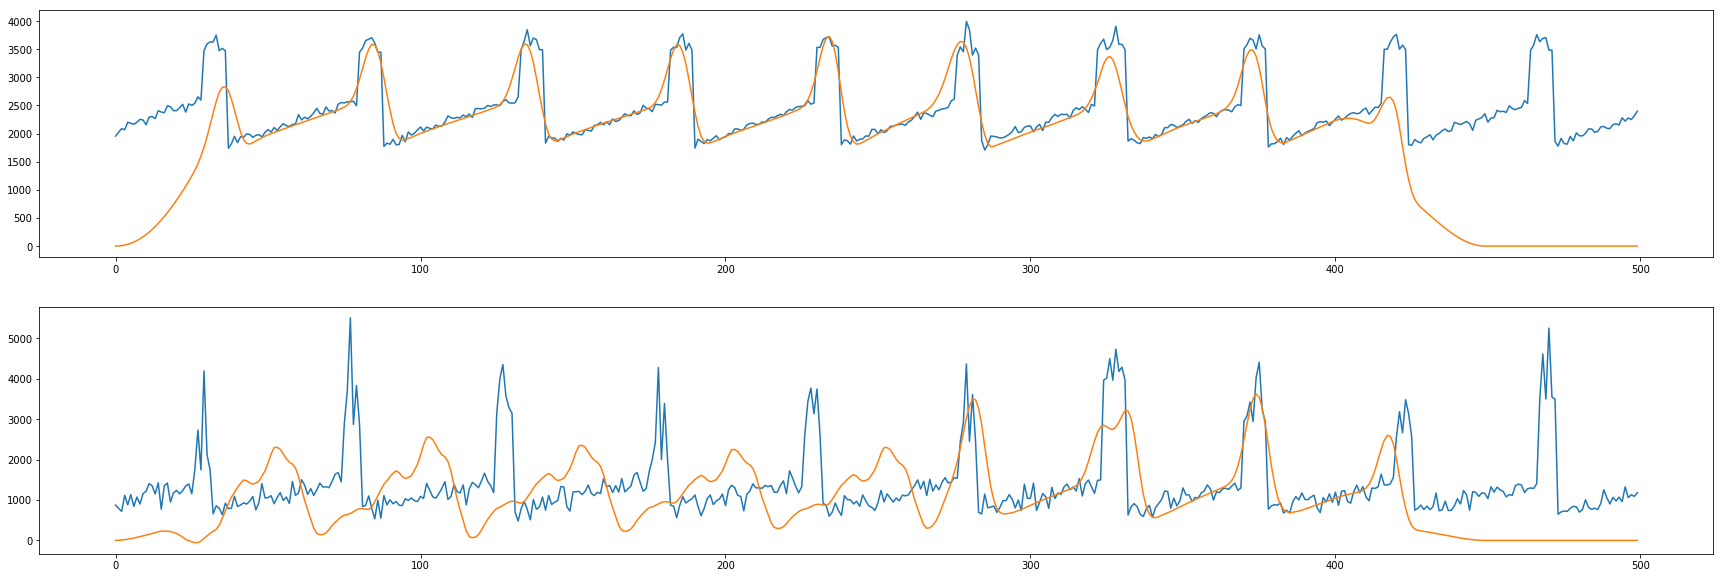

(75, 4, 624.227063920077, 425.36454339311337, 873.1124075148582)


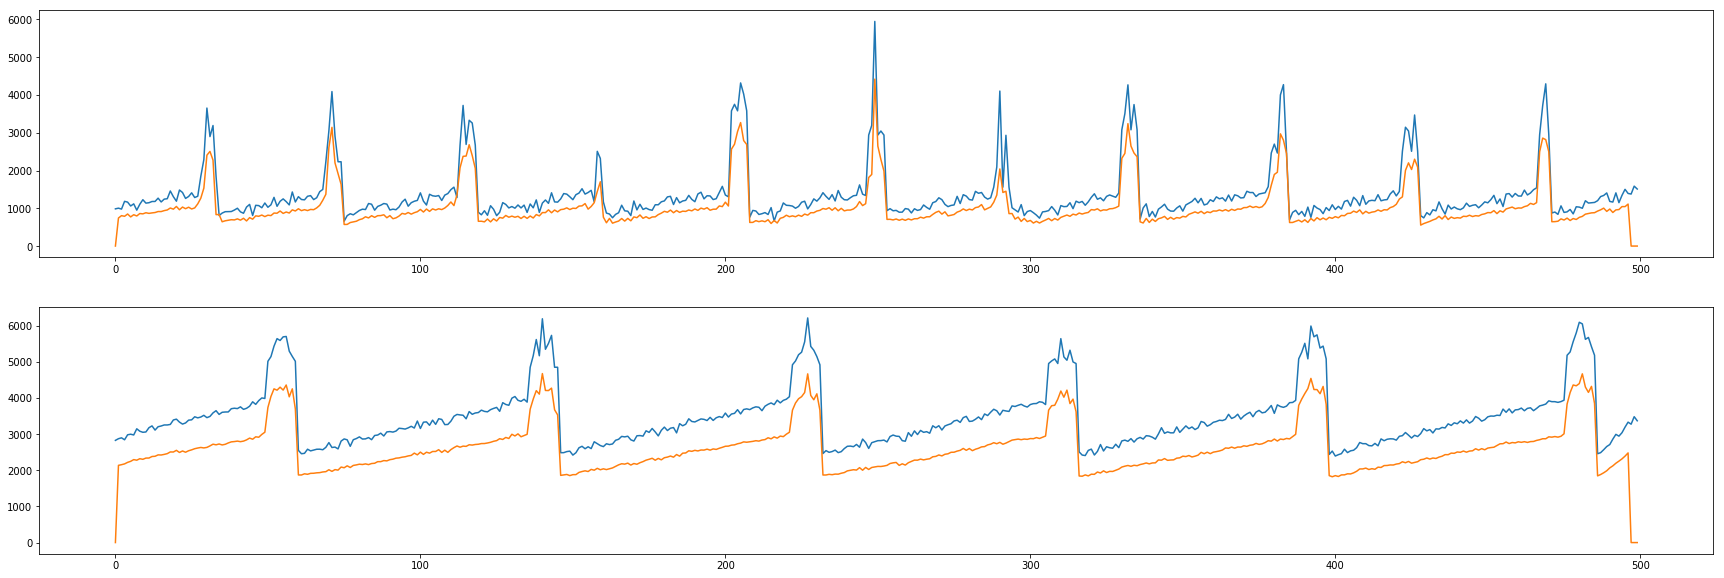

(75, 6, 505.7543038855715, 370.00656608702235, 699.0913319980924)


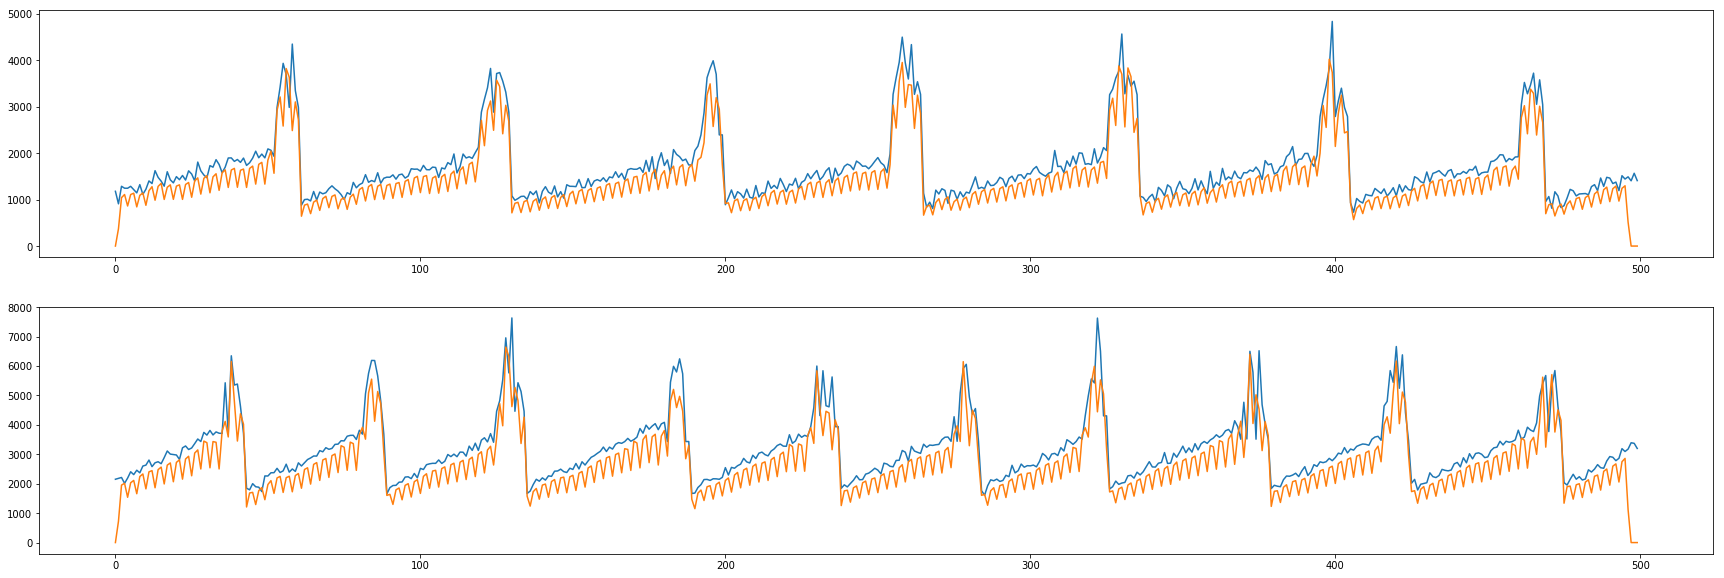

(75, 8, 404.77376130666516, 293.2522251243521, 566.7367043761793)


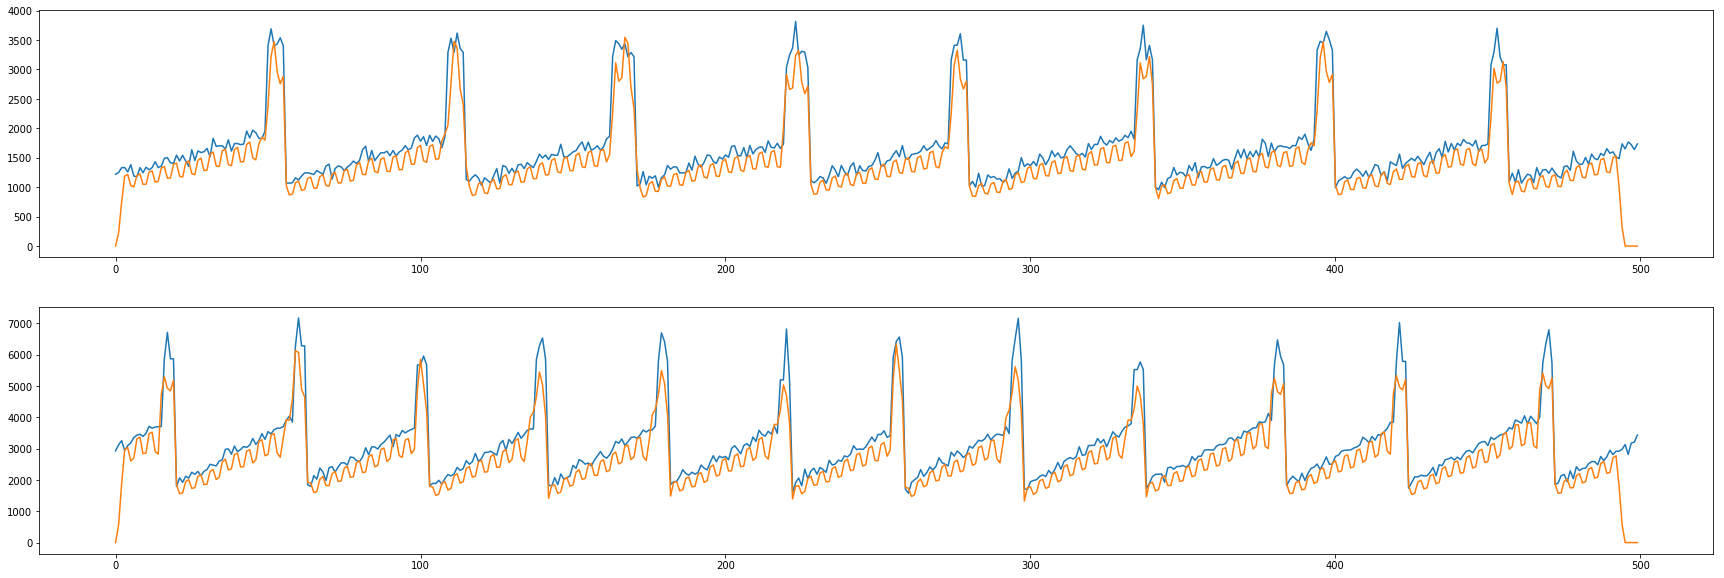

(75, 12, 317.95002140012343, 229.21331750997328, 466.125914755417)


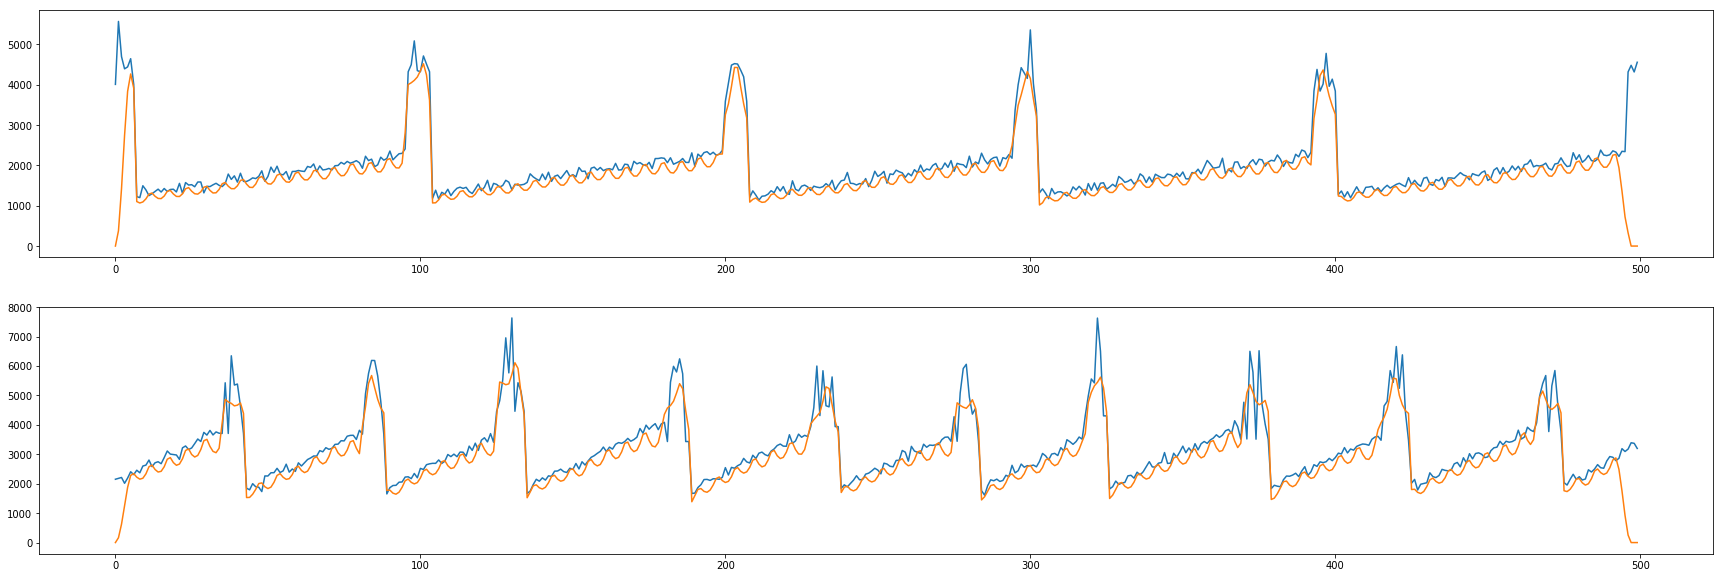

(75, 20, 286.9938547626225, 173.94792763054687, 541.7662776645603)


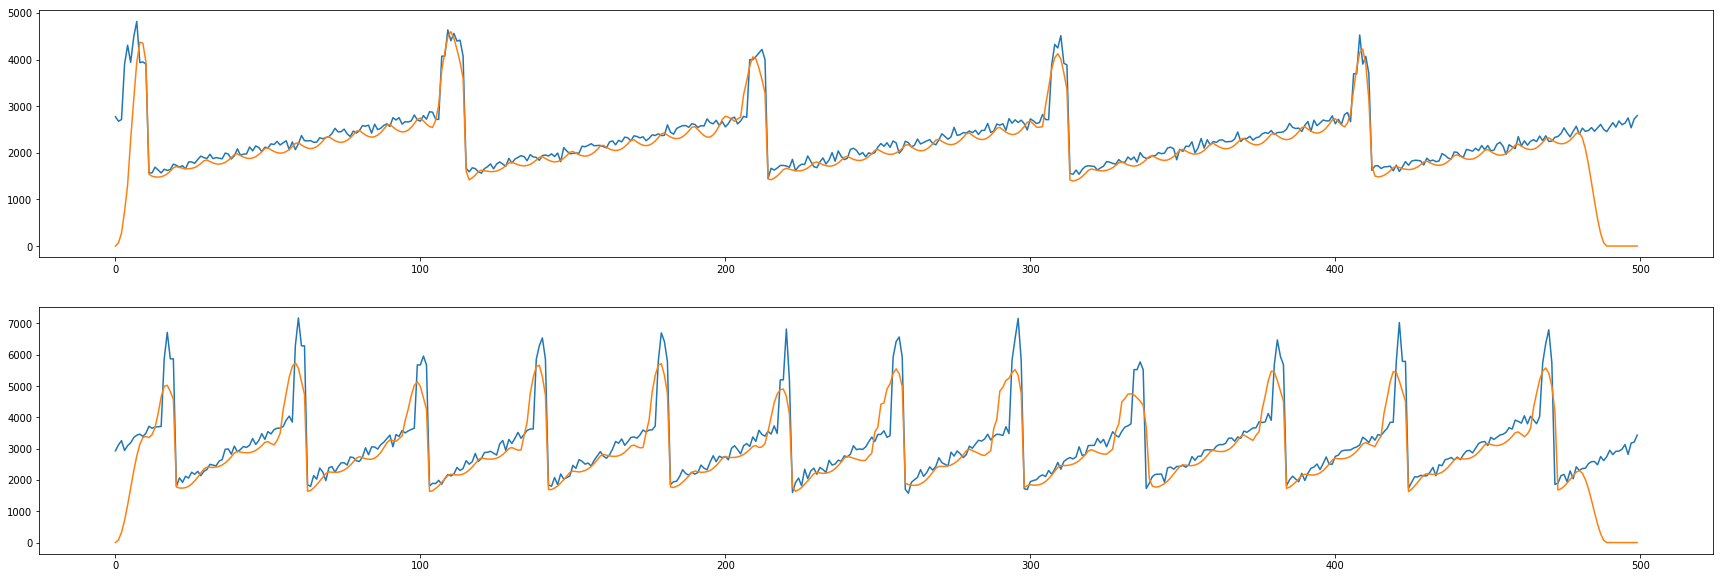

(75, 30, 303.1012050286296, 159.48950394181125, 604.7984383329252)


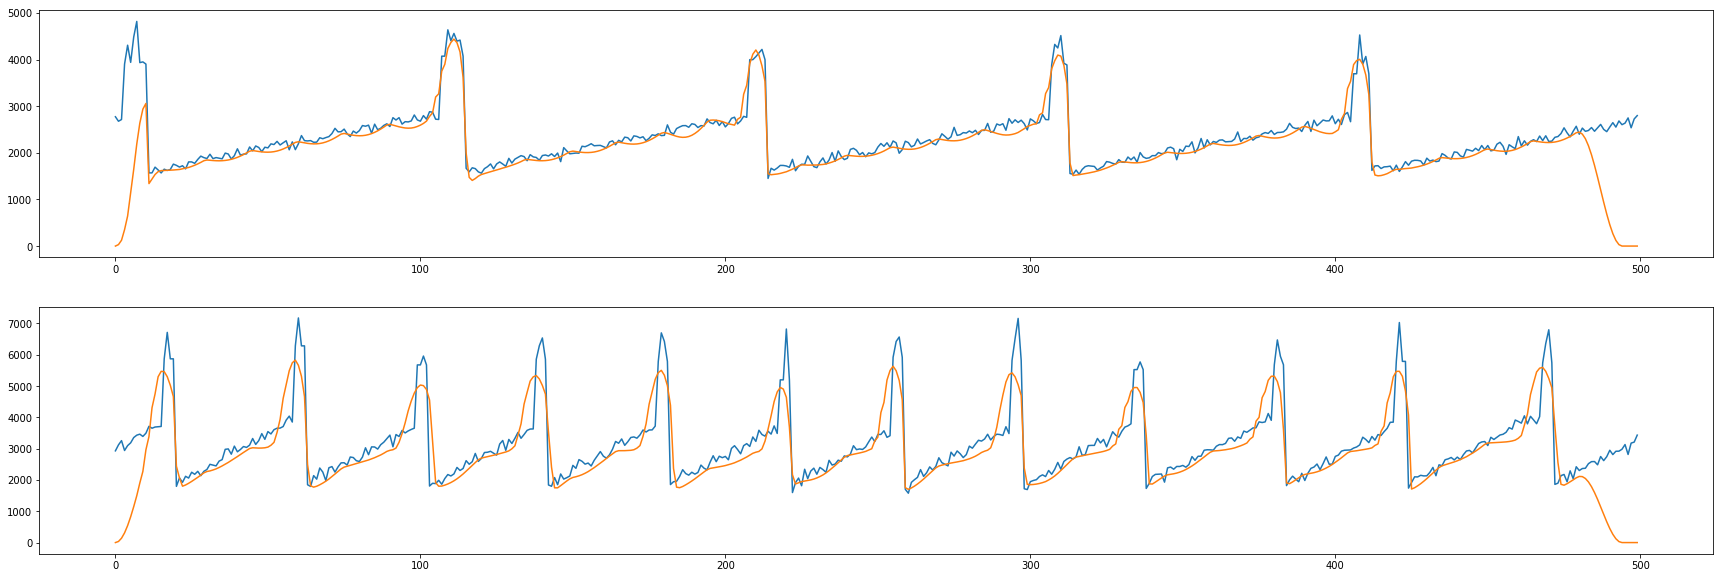

(75, 50, 346.22981995284715, 189.9970051341527, 648.2244564062986)


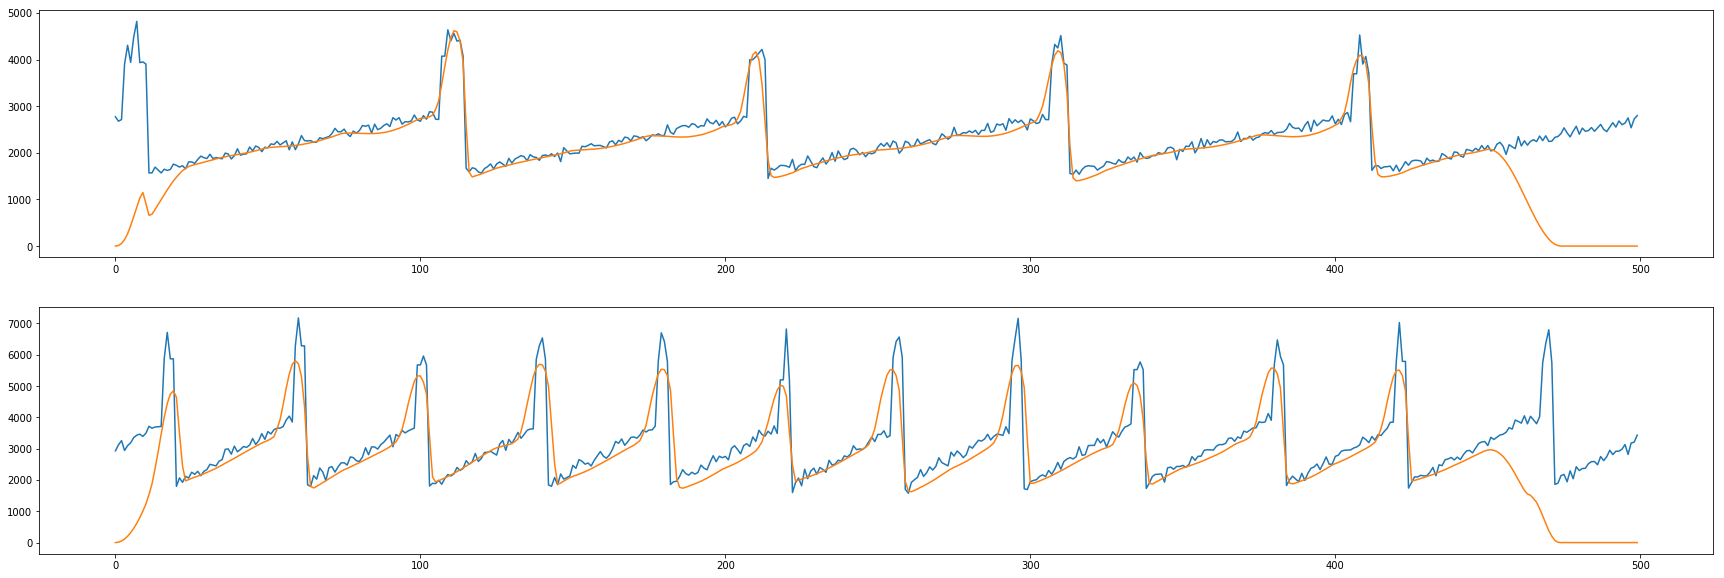

(75, 100, 502.9258310531292, 213.3808752033751, 906.6274714669213)


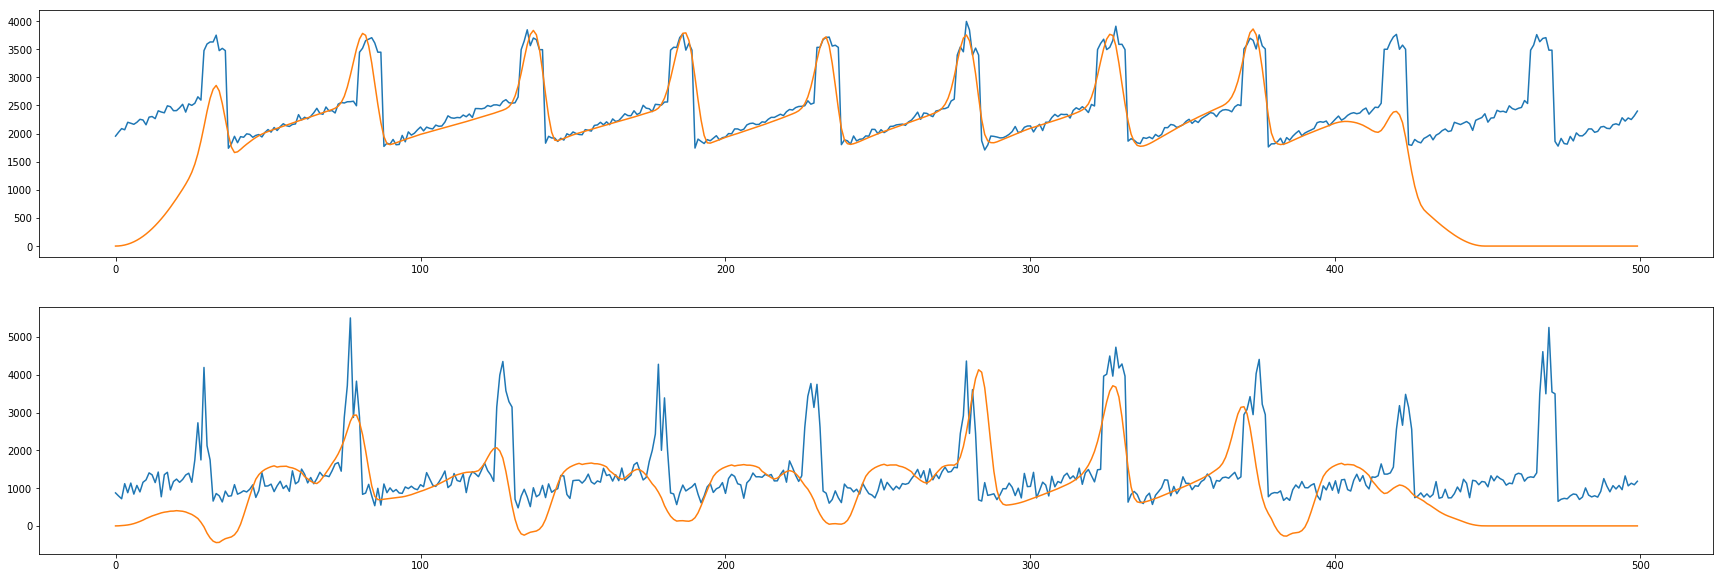

(100, 4, 627.9963960198531, 418.7844108261198, 878.1343967416892)


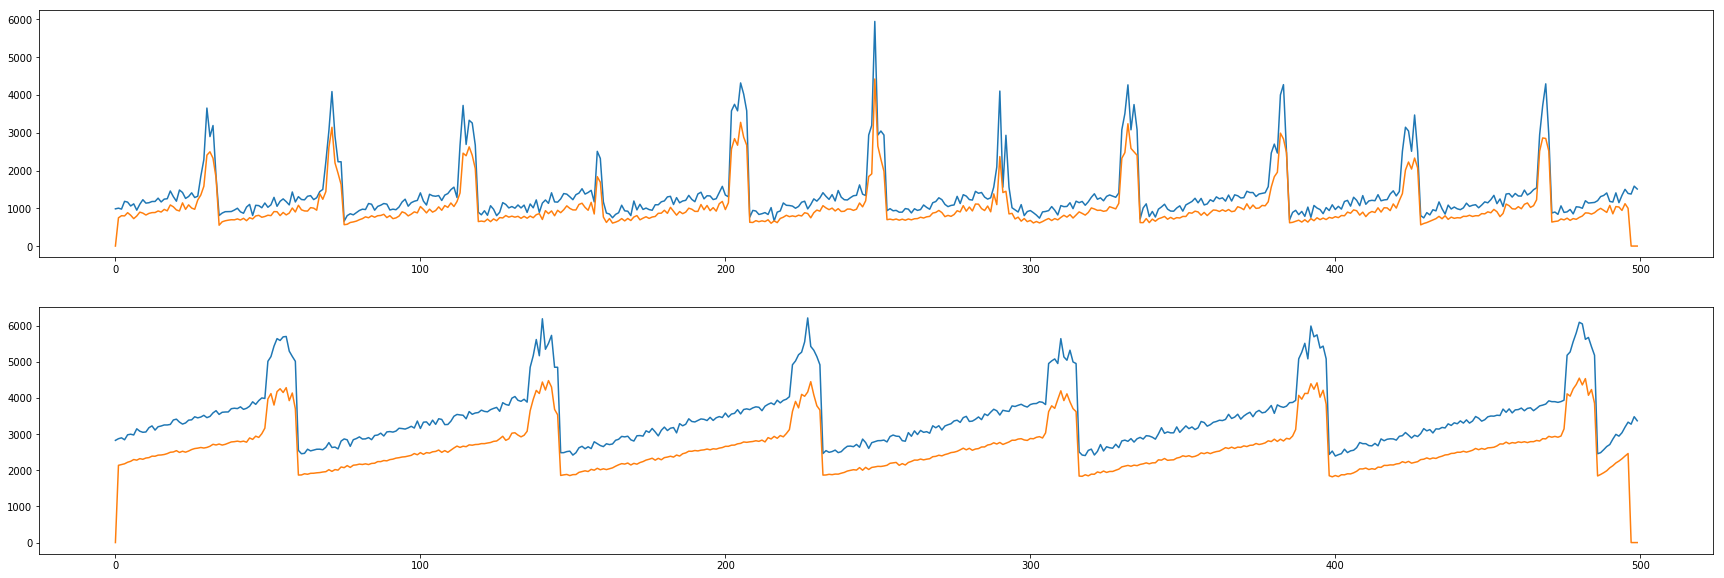

(100, 6, 504.20039463815823, 361.35516213035316, 693.850167403693)


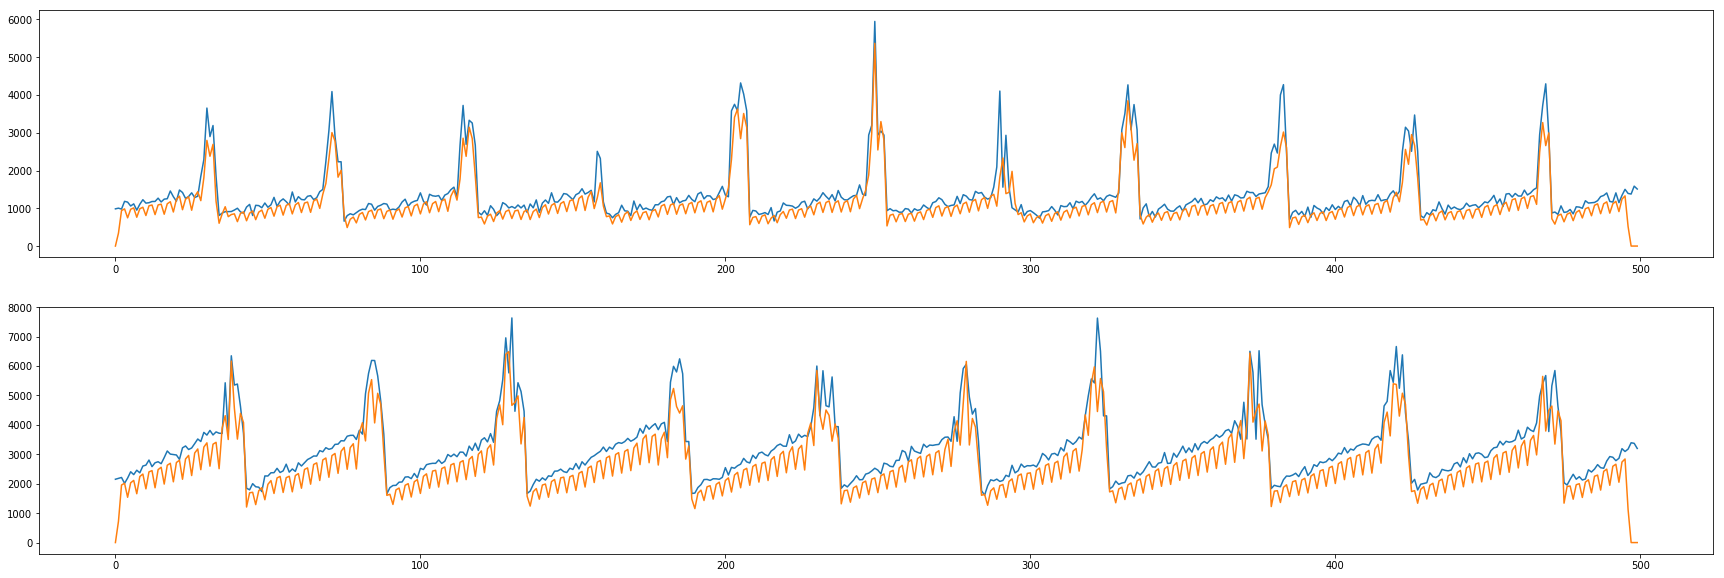

(100, 8, 401.664205285314, 284.8117845996737, 558.4097597141426)


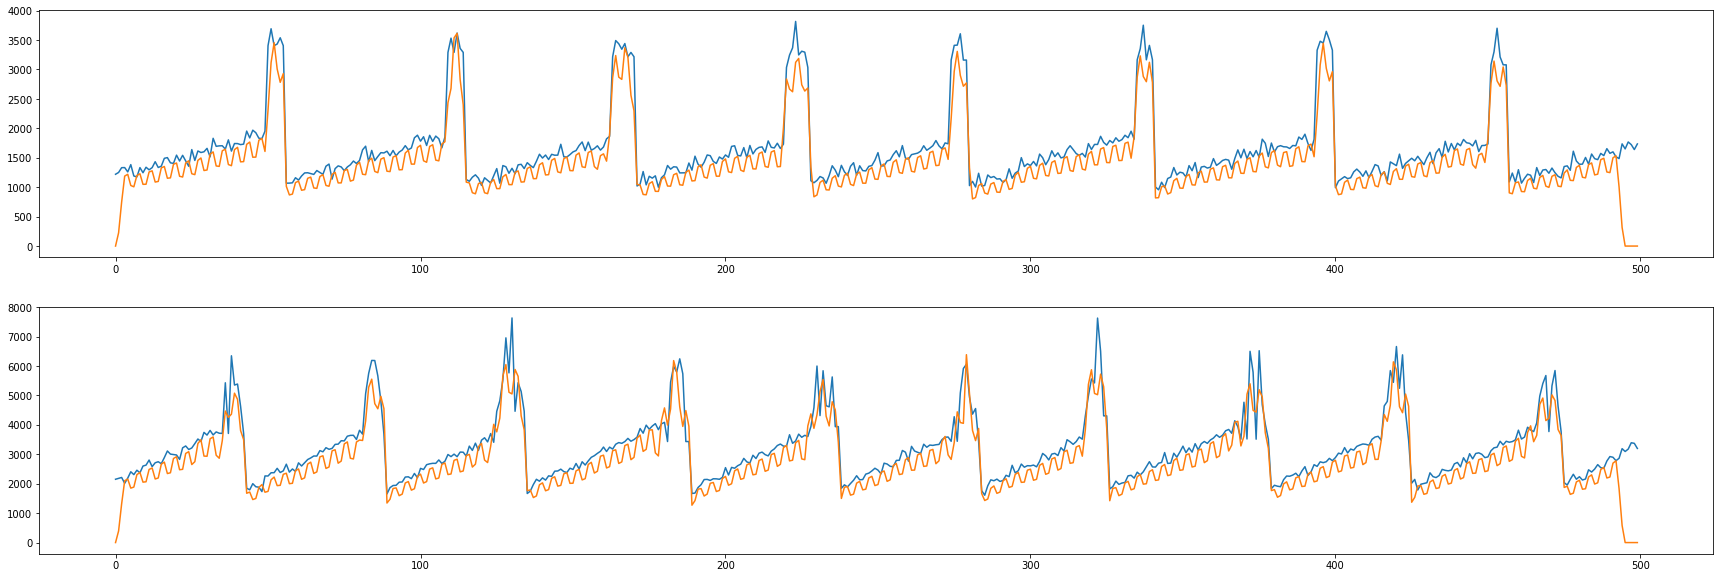

(100, 12, 311.02544059162926, 227.60018521905798, 473.31050343360744)


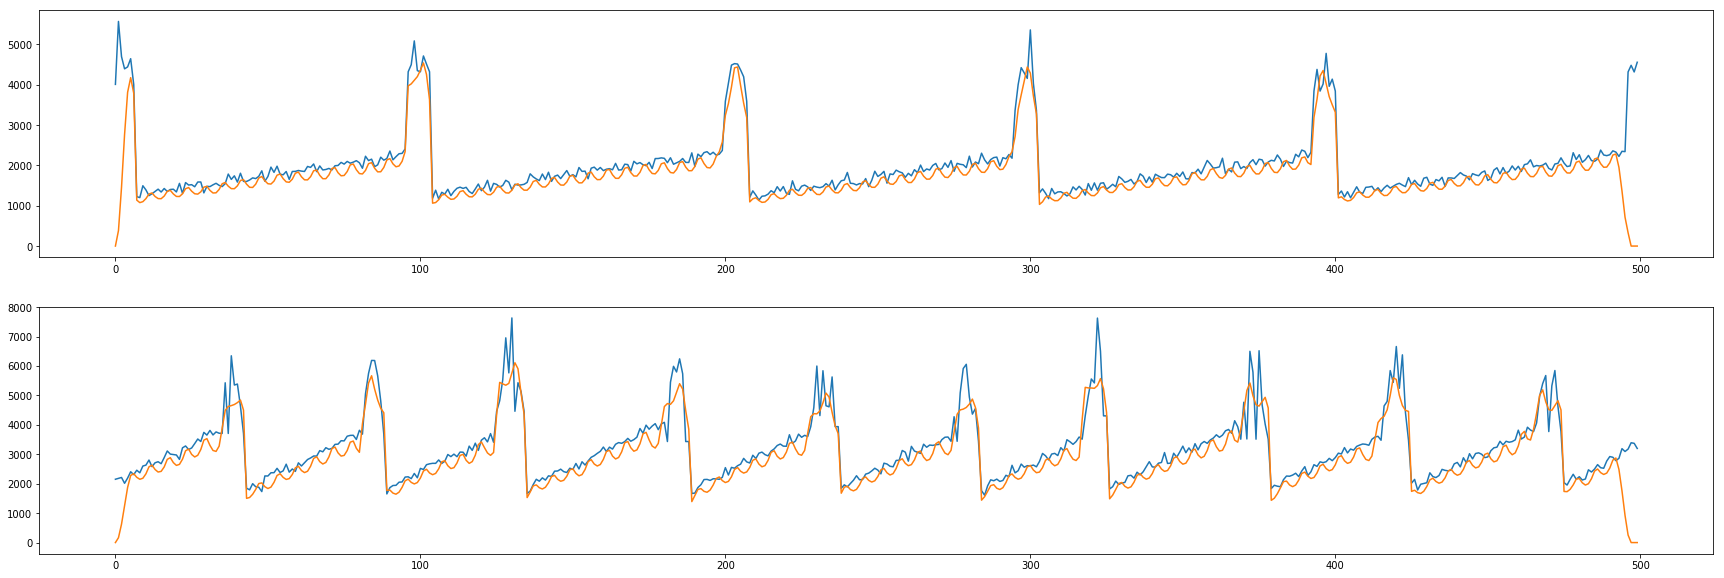

(100, 20, 273.458006730561, 164.09348022476658, 469.3823260768341)


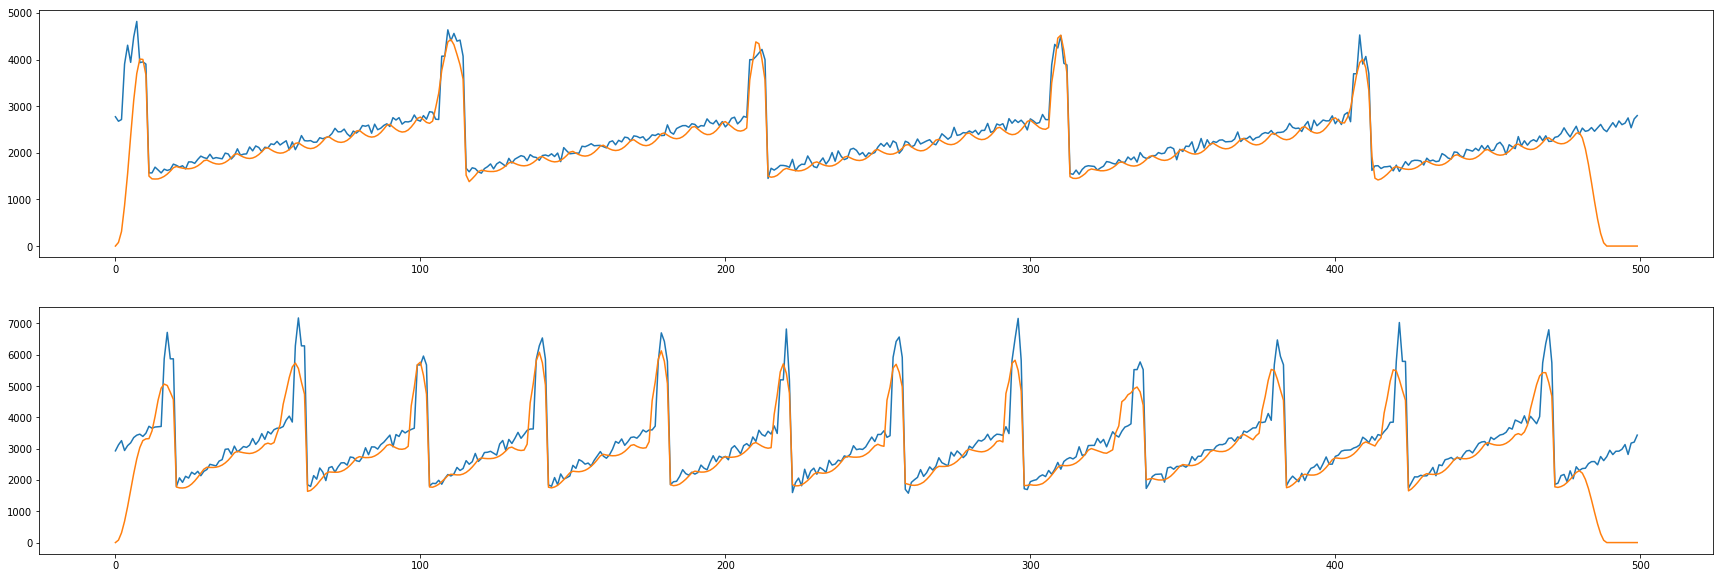

(100, 30, 291.4960179025722, 146.2957930571583, 590.383767547901)


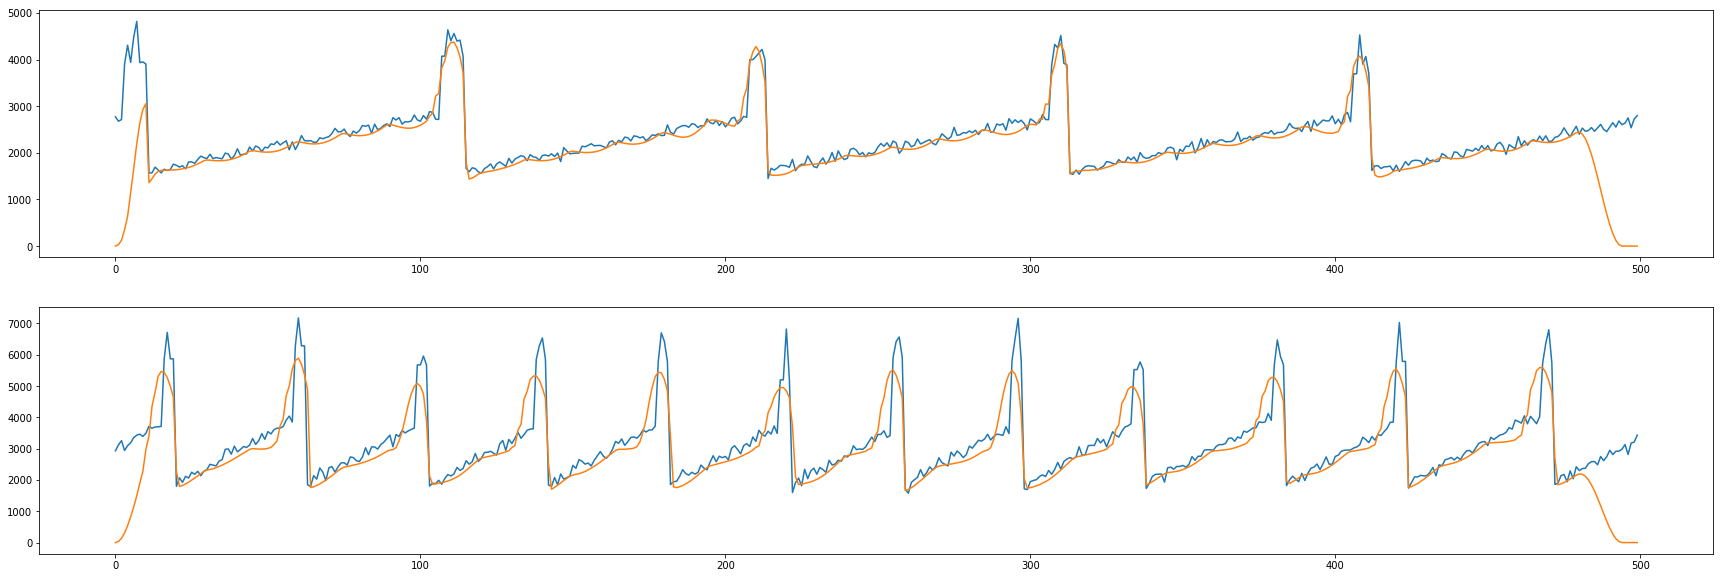

(100, 50, 333.696625605513, 180.17306138551479, 645.4567088992663)


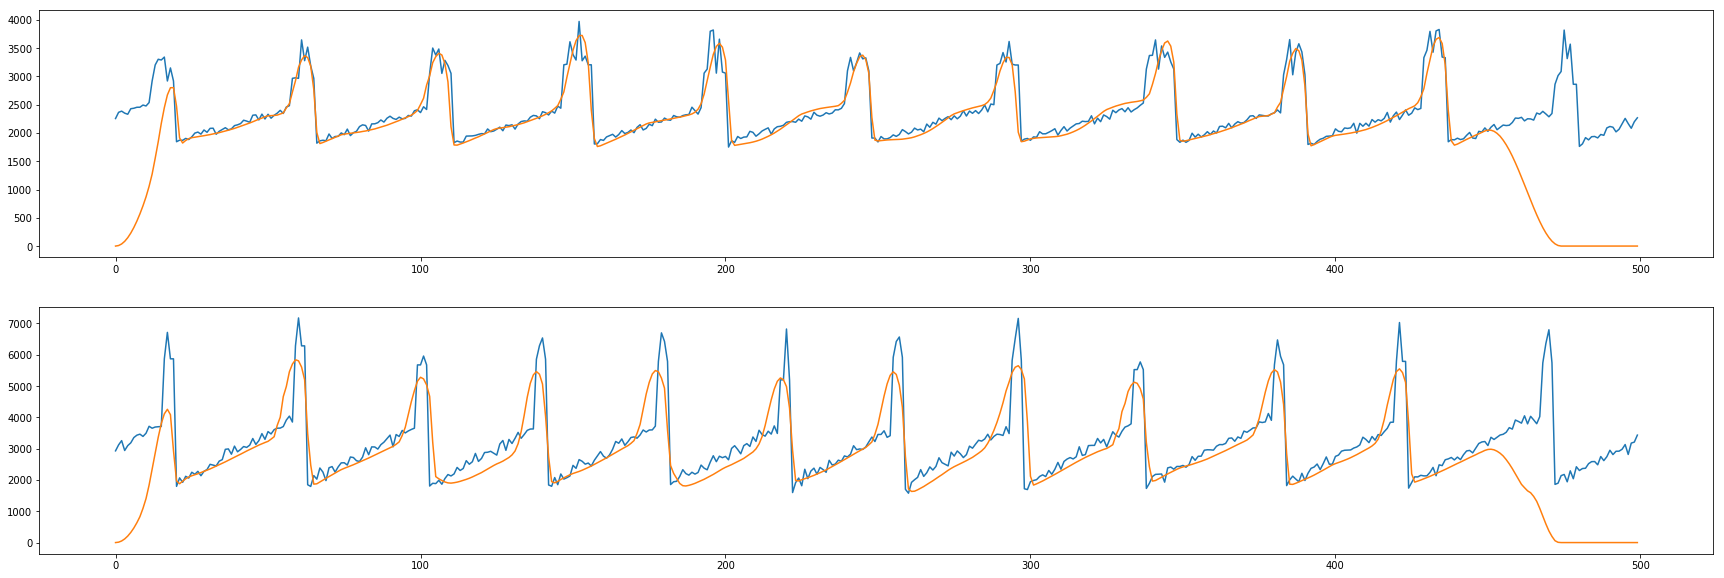

(100, 100, 476.27955931113826, 197.8754124656234, 785.3522423134242)


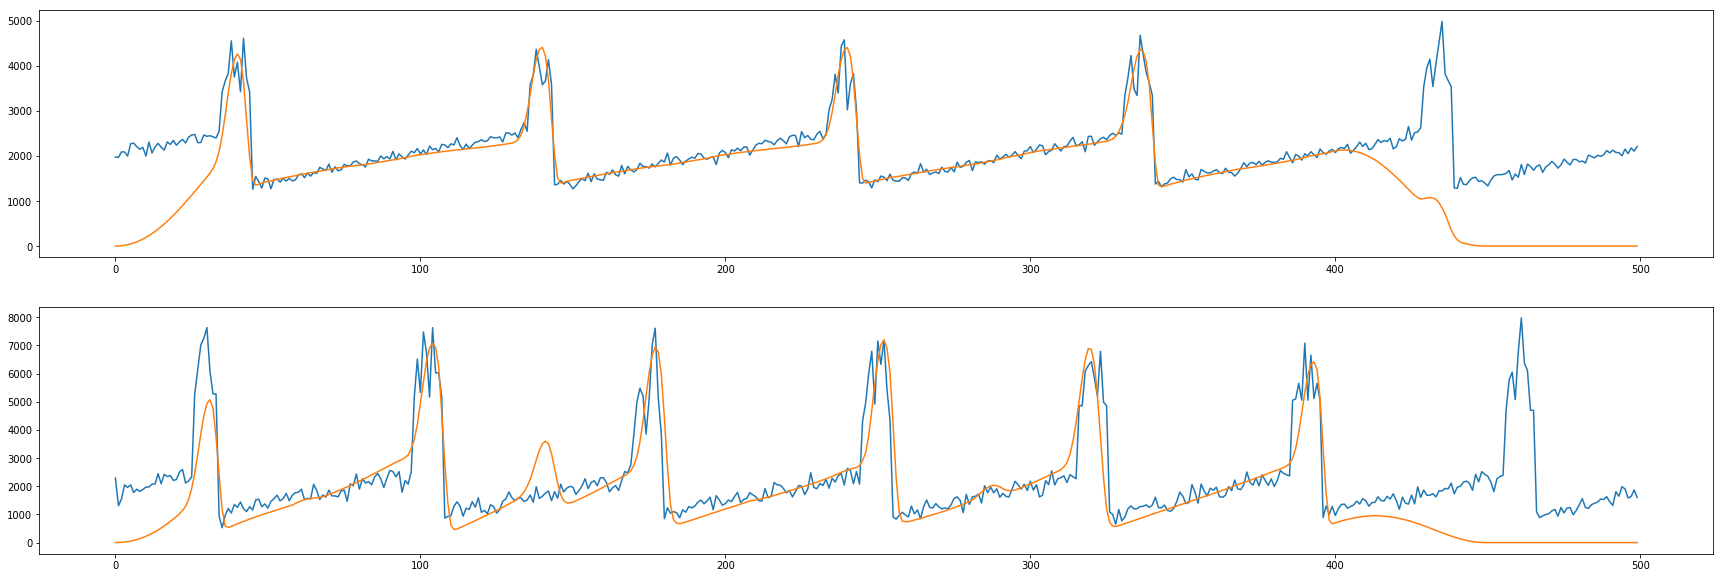

(150, 4, 626.0967613038181, 397.644360381144, 884.24902652952)


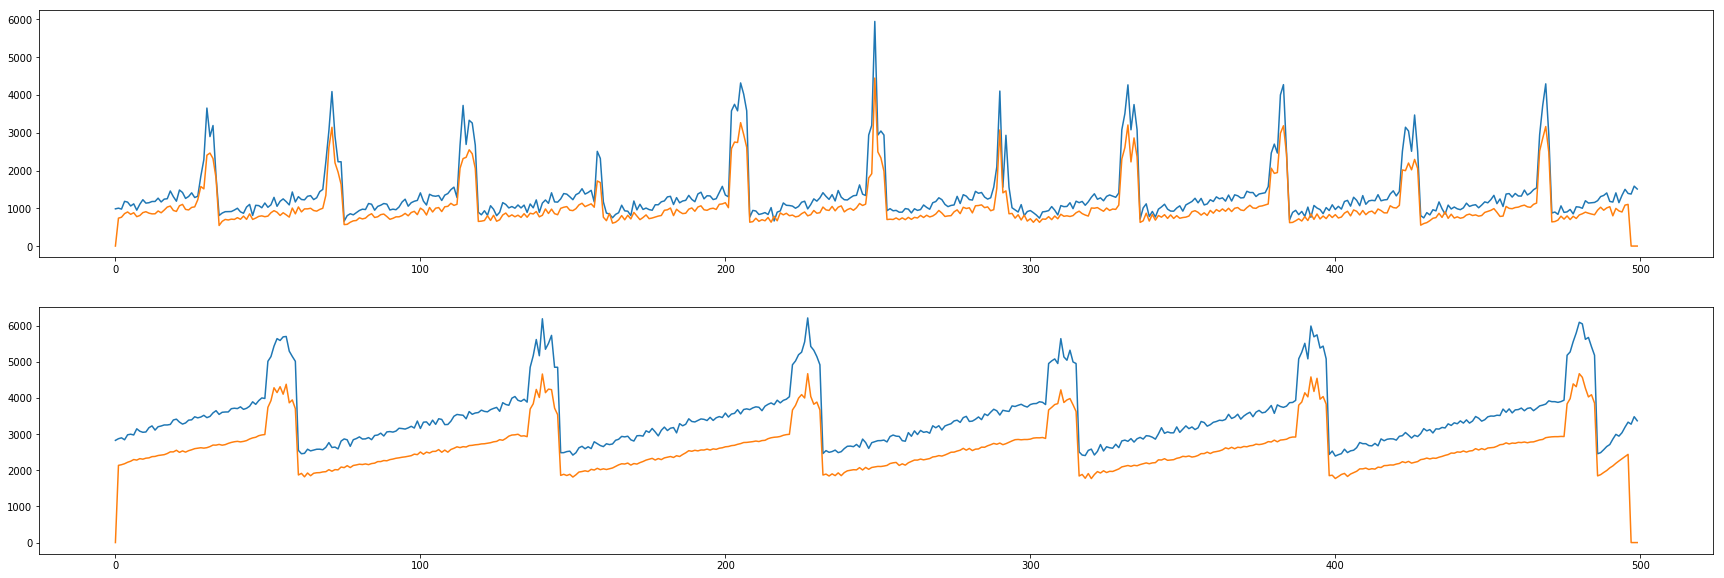

(150, 6, 502.5613252413578, 359.1018031480508, 690.6859371839654)


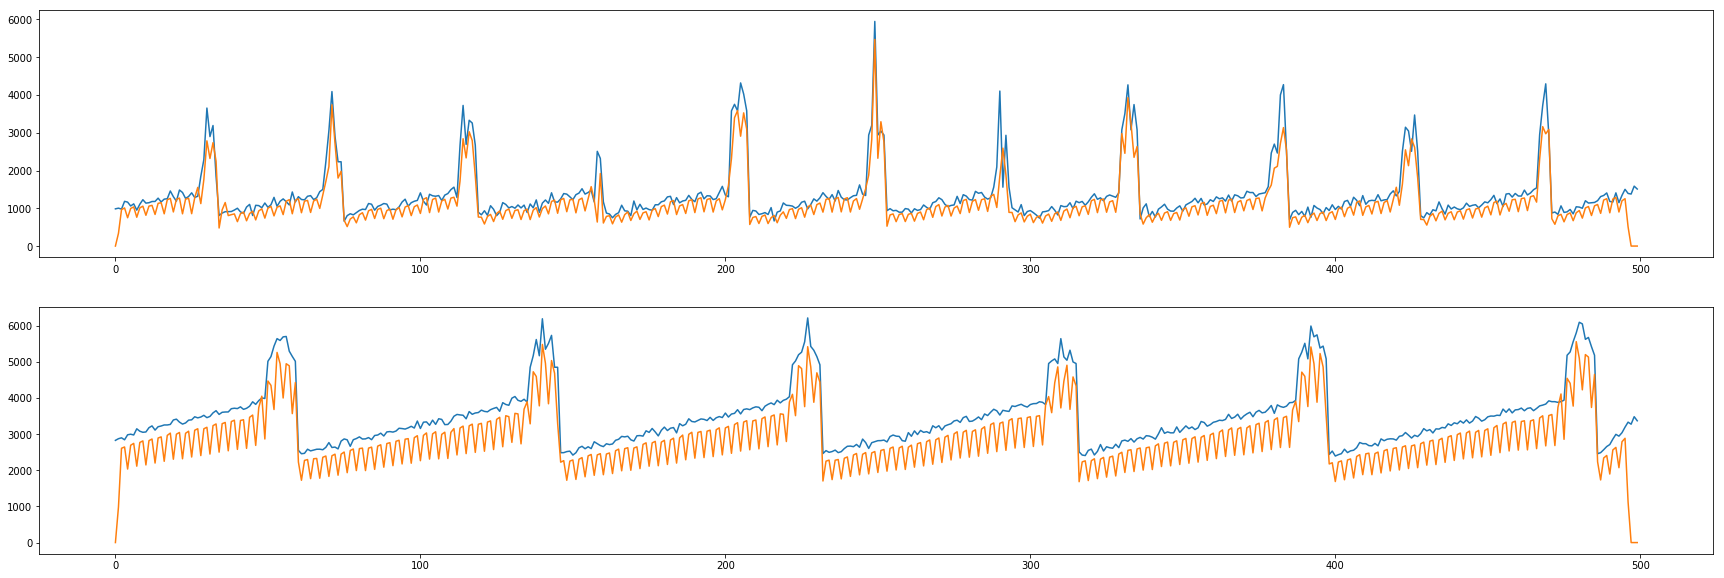

(150, 8, 398.02032414468925, 281.7849570541648, 566.300889841065)


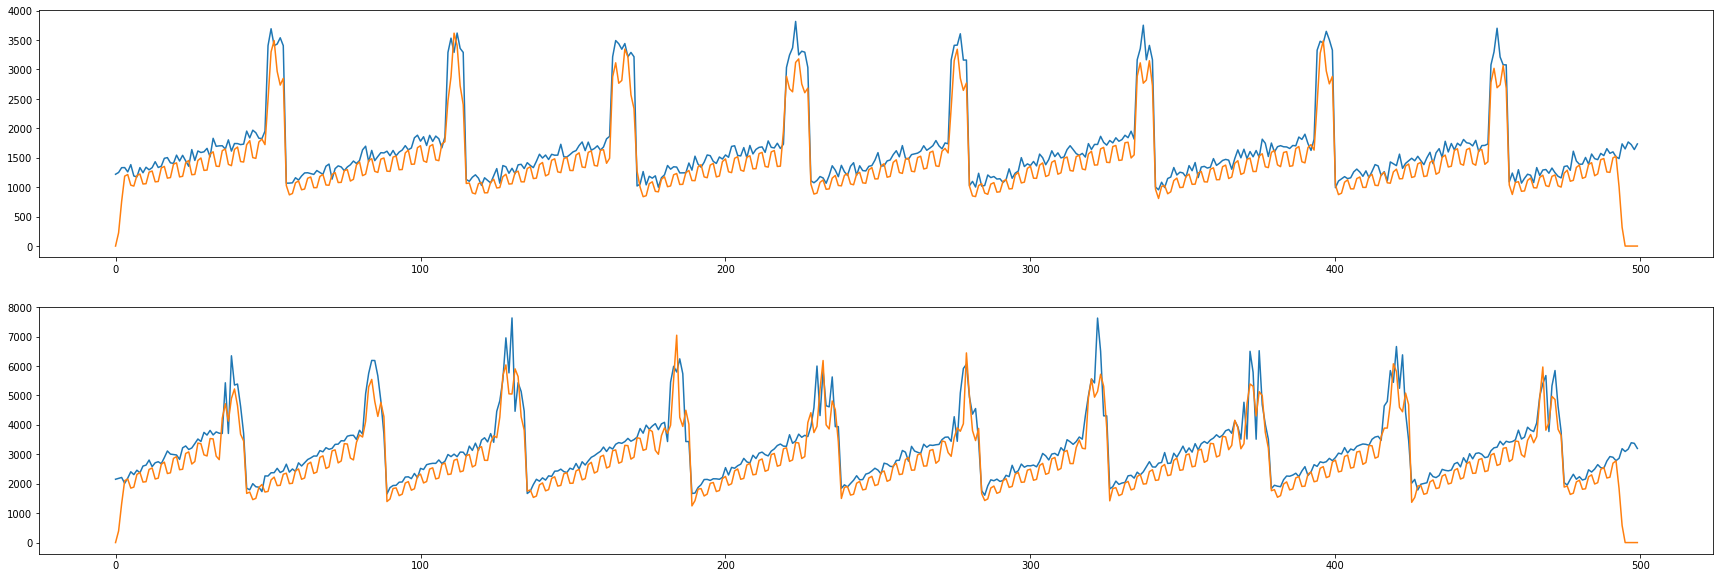

(150, 12, 303.85238850211937, 219.1290370269555, 468.00235442864374)


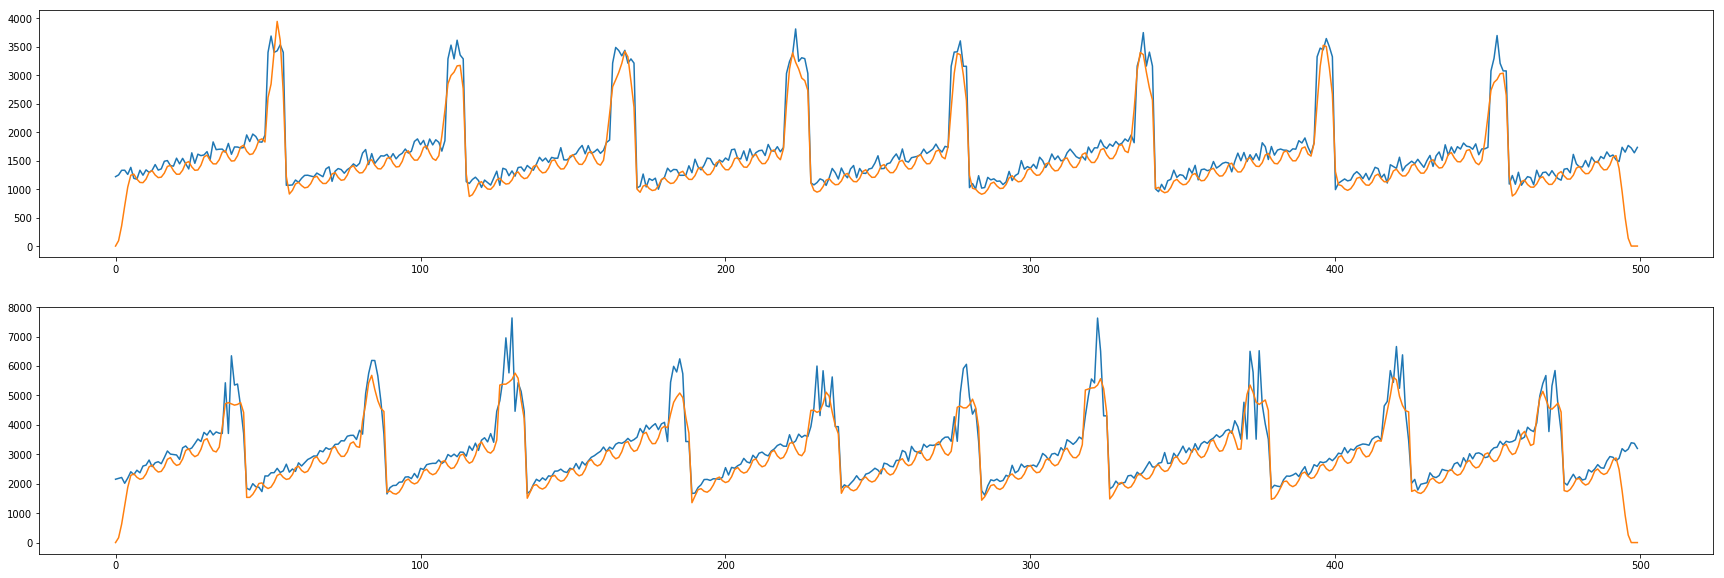

(150, 20, 262.4853943329903, 161.48033905338033, 448.67078938436555)


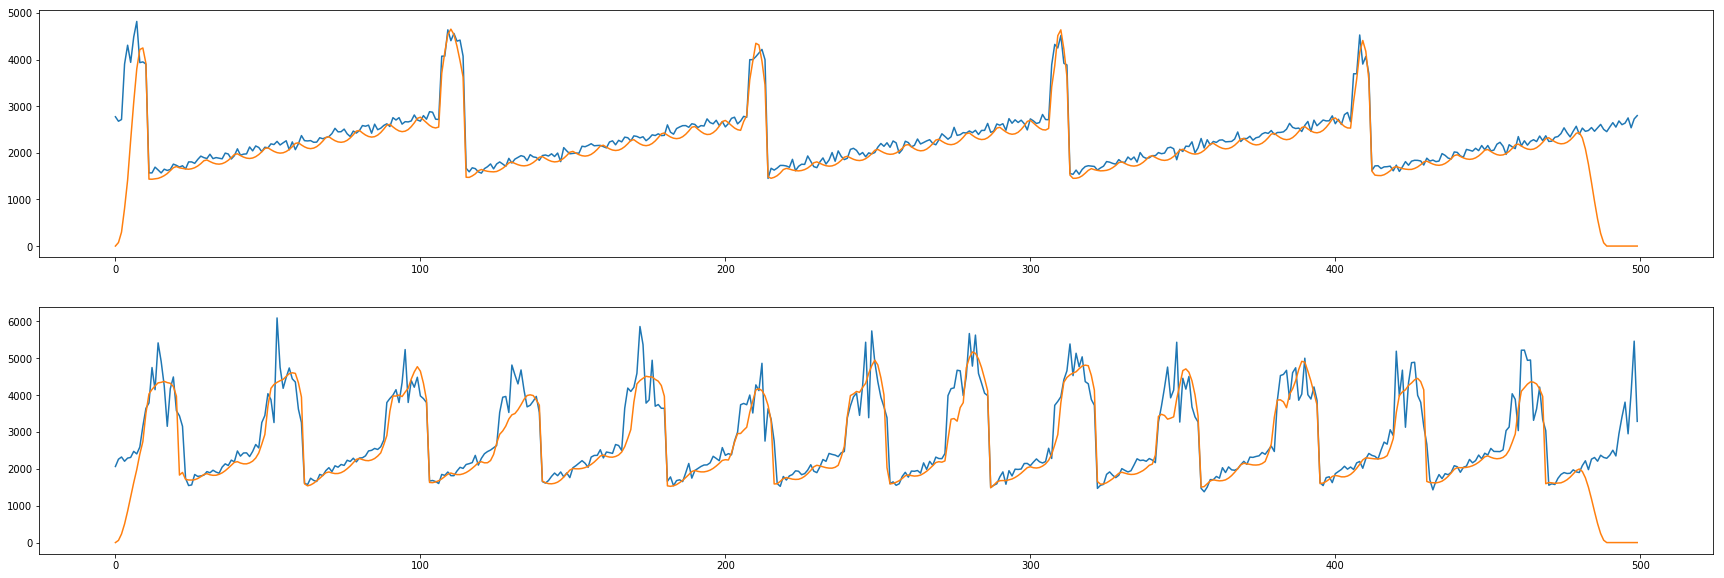

(150, 30, 272.02223572693697, 152.203852835961, 567.1545295216512)


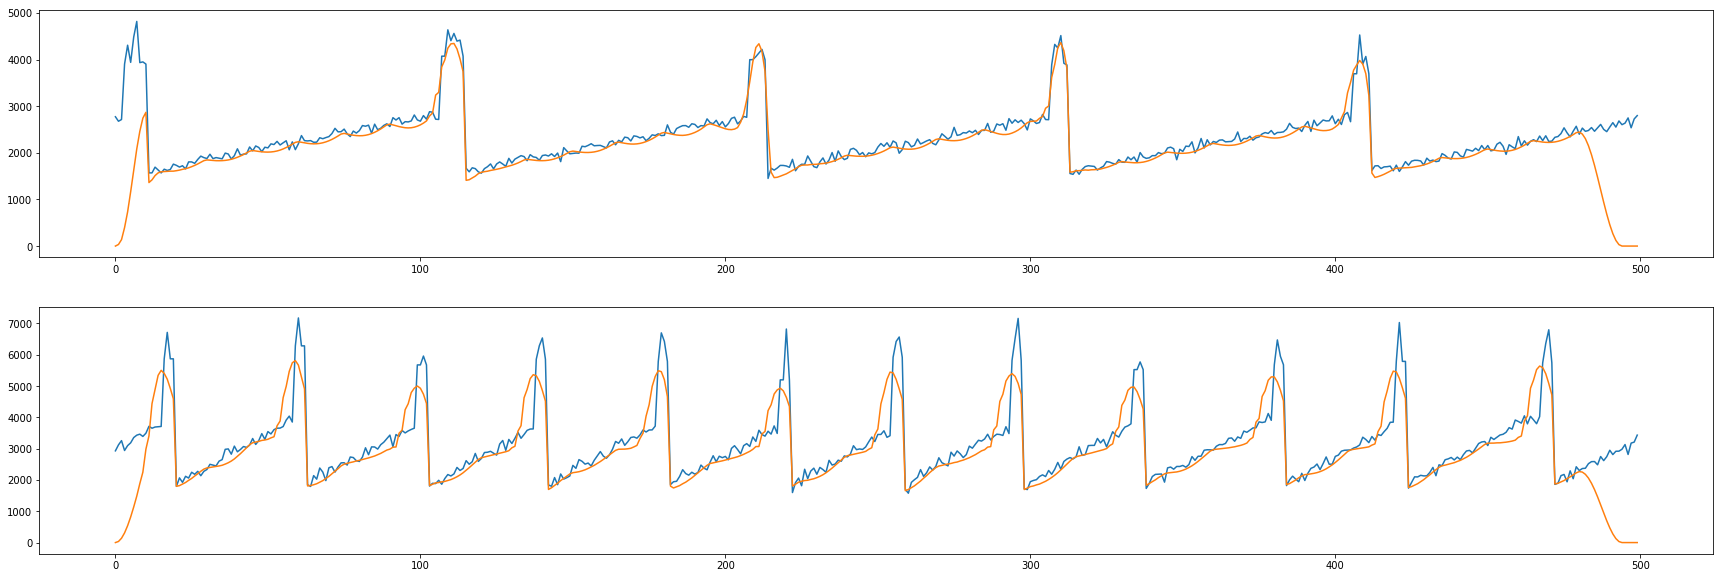

(150, 50, 318.66795284649805, 159.99070479429457, 639.3440106049875)


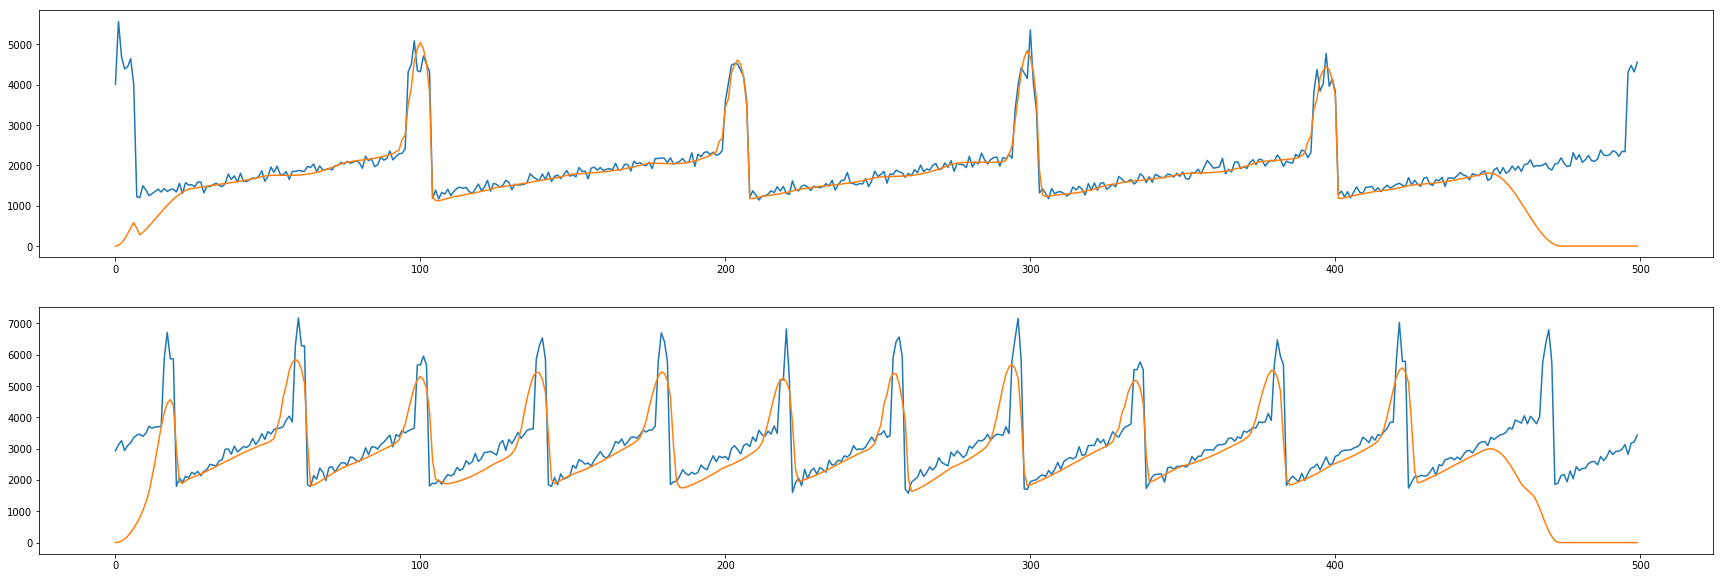

(150, 100, 442.72846716266463, 214.81106598552947, 829.4393794766085)


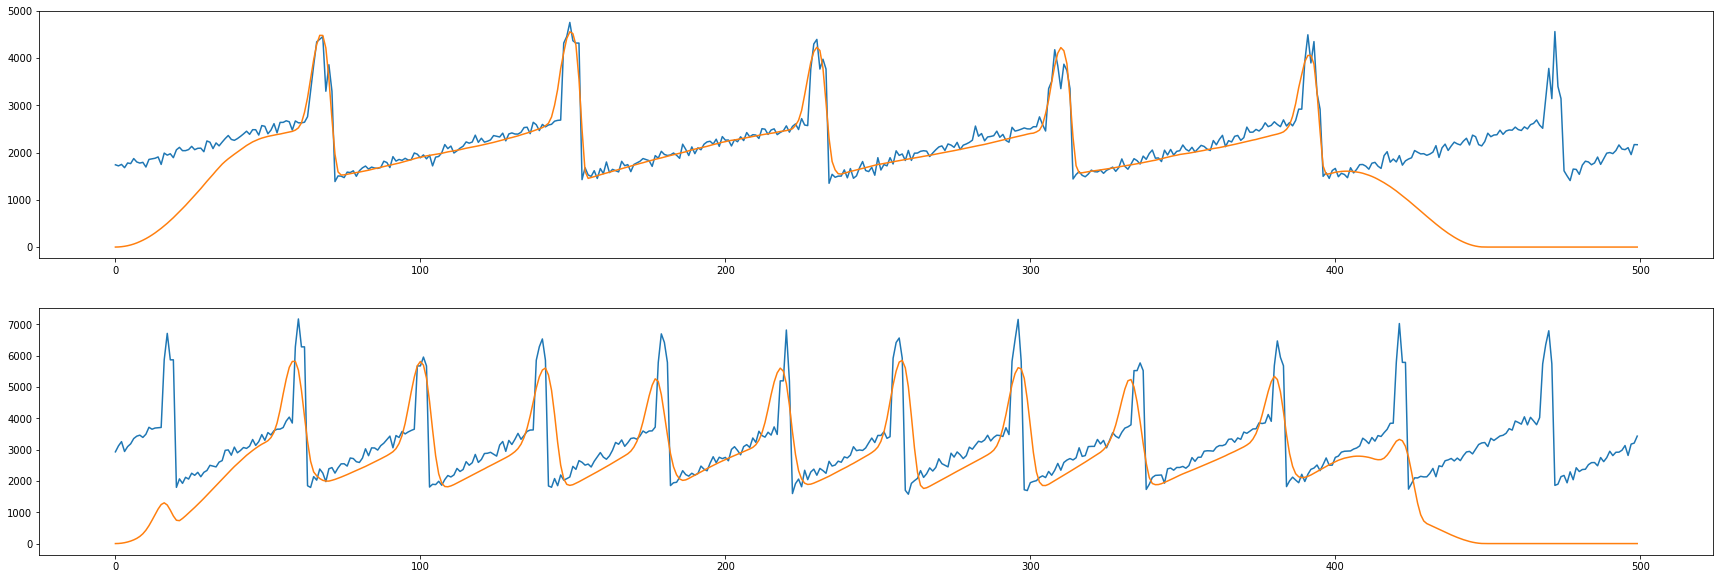

In [31]:
for k_cluster in k_clusters:
    for seg_len in seg_lens:
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_slide, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)
        
        reco_error=[]
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, int(seg_len/2) , time_stamps=False)
            reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=int(seg_len/2))
            error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((n_rho, error))
        print((k_cluster,seg_len, np.mean(np.array(reco_error)[:,1]),np.min(np.array(reco_error)[:,1]),np.max(np.array(reco_error)[:,1])), flush=True)
        best_reco_ind=np.argmin(np.array(reco_error)[:,1])
        worst_reco_ind=np.argmax(np.array(reco_error)[:,1])
        
        plt.gcf().set_size_inches(30,10)
        plt.subplot(2,1,1)
        valid_segments= sc.segmentation(rho_valid[best_reco_ind], seg_len, int(seg_len/2) , time_stamps=False)
        reco = sc.reconstruct(valid_segments, rho_valid[best_reco_ind], cluster, rel_offset=False, seg_slide=int(seg_len/2))
        plt.plot(rho_valid[best_reco_ind])
        plt.plot(reco)
        plt.subplot(2,1,2)
        valid_segments= sc.segmentation(rho_valid[worst_reco_ind], seg_len, int(seg_len/2) , time_stamps=False)
        reco = sc.reconstruct(valid_segments, rho_valid[worst_reco_ind], cluster, rel_offset=False, seg_slide=int(seg_len/2))
        plt.plot(rho_valid[worst_reco_ind])
        plt.plot(reco)
        plt.show()

In [10]:
##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_slide, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)

In [11]:
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

625.0443585003688


(array([ 9., 23., 47., 54., 45., 37., 13., 15.,  6.,  1.]),
 array([460.44998388, 501.33712006, 542.22425624, 583.11139243,
        623.99852861, 664.88566479, 705.77280098, 746.65993716,
        787.54707334, 828.43420953, 869.32134571]),
 <a list of 10 Patch objects>)

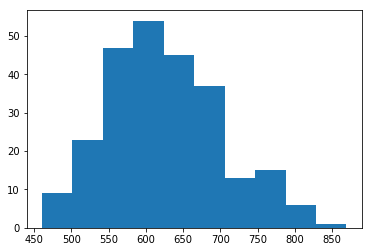

In [18]:
reco_error=[]
for n_rho, rho in enumerate(rho_valid):
    valid_segments= sc.segmentation(rho, seg_len, int(seg_len/2) , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=int(seg_len/2))
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    reco_error.append((n_rho, error))
print(np.mean(np.array(reco_error)[:,1]), flush=True)
plt.hist(np.array(reco_error)[:,1])

In [32]:
import importlib
import os
import fnmatch
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import csv
from sklearn import tree
import sys
sys.stdout.flush()
import math
import matplotlib.pyplot as plt
from matplotlib.table import Table
import segment_cluster as sc
import importlib
importlib.reload(sc)
from sklearn.cluster import KMeans
import pandas as pd

np.random.seed(0)

cwd = os.getcwd()
if cwd.split("/")[1] == "home":
    data_path="/home/jkok1g14/Documents/GRS1915+105/data/Std1_PCU2"
elif cwd.split("/")[1] == "export":
    data_path="/export/data/jakubok/GRS1915+105/Std1_PCU2"
else:
    print("Set the path of data directory!", Flush=True)

#creates a dictionary of observation_ID: "state" items for labeled observations
clean_belloni = open('1915Belloniclass_updated.dat')
lines = clean_belloni.readlines()
states = lines[0].split()
belloni_clean = {}
for h,l in zip(states, lines[1:]):
    belloni_clean[h] = l.split()
    #state: obsID1, obsID2...
ob_state = {}
for state, obs in belloni_clean.items():
    if state == "chi1" or state == "chi2" or state == "chi3" or state == "chi4": state = "chi"
    for ob in obs:
        ob_state[ob] = state

#creates a list of labeled observations with abailable data
available = []
pool=[]
#/home/jkok1g14/Documents/GRS1915+105/data
#/export/data/jakubok/GRS1915+105/Std1_PCU2
for root, dirnames, filenames in os.walk(data_path):
    for filename in fnmatch.filter(filenames, "*_std1_lc.txt"):
        available.append(filename)
for ob, state in ob_state.items():
    if ob+"_std1_lc.txt" in available:
        pool.append(ob)  

#create a list of arrays with time and counts for the set of Belloni classified observations
lc_dirs=[]
lcs=[]
ids=[]
for root, dirnames, filenames in os.walk(data_path):    
    for filename in fnmatch.filter(filenames, "*_std1_lc.txt"):
        if filename.split("_")[0] in pool:
            lc_dirs.append(os.path.join(root, filename))

            
#make 2D arrays for light curves, with columns of counts and time values
for lc in lc_dirs:
    ids.append(lc.split("/")[-1].split("_")[0])
    f=np.loadtxt(lc)
    f=np.transpose(f)#,axis=1)
    f=f[0:2]
    ###1s average and time check to eliminate points outside of GTIs
    f8t = np.mean(f[0][:(len(f[0])//8)*8].reshape(-1, 8), axis=1)
    f8c = np.mean(f[1][:(len(f[1])//8)*8].reshape(-1, 8), axis=1)
    #f8c=f8c-np.mean(f8c)#normalisation/mean centering/whatever you desire most
    rm_points = []
    skip=False
    for i in range(len(f8t)-1):
        if skip==True:
            skip=False
            continue
        delta = f8t[i+1]-f8t[i]
        if delta > 1.0:
            rm_points.append(i+1)
            skip=True   
    times=np.delete(f8t,rm_points)
    counts=np.delete(f8c,rm_points)
    lcs.append(np.stack((times,counts)))
#a list of light curve 2D arrays

lc_classes=[]
for i in ids:
    lc_classes.append(ob_state[i])

drop_classes=[]
for clas, no in Counter(lc_classes).items():
    if no<7:
        drop_classes.append(clas)

lcs_abu = []
classes_abu = []
ids_abu = []
for n, lc in enumerate(lc_classes):
    if lc not in drop_classes:
        classes_abu.append(lc)
        lcs_abu.append(lcs[n])
        ids_abu.append(ids[n])  
#a list of light curve 2D arrays of classes with at least 7 light curves
x_train, x_test, y_train, y_test, id_train, id_test = train_test_split(lcs_abu, classes_abu, ids_abu, test_size=0.25, stratify=classes_abu)

rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)

In [34]:
len(lcs_abu)

202